## Wine Quality Analysis by Augustine Ojo

##### Dataset by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [500]:
red_wine_df  = pd.read_csv("winequality-red.csv" , delimiter = ";")
white_wine_df =pd.read_csv("winequality-white.csv", delimiter =";")

In [501]:
red_wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [502]:
white_wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

## Red Wine Data Explorations and Analysis

In [503]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [504]:
# red_wine_df.describe().T
r_wine_df = red_wine_df.describe().T
round(r_wine_df,2)

count   mean    std   min    25%    50%    75%     max
fixed acidity         1599.0   8.32   1.74  4.60   7.10   7.90   9.20   15.90
volatile acidity      1599.0   0.53   0.18  0.12   0.39   0.52   0.64    1.58
citric acid           1599.0   0.27   0.19  0.00   0.09   0.26   0.42    1.00
residual sugar        1599.0   2.54   1.41  0.90   1.90   2.20   2.60   15.50
chlorides             1599.0   0.09   0.05  0.01   0.07   0.08   0.09    0.61
free sulfur dioxide   1599.0  15.87  10.46  1.00   7.00  14.00  21.00   72.00
total sulfur dioxide  1599.0  46.47  32.90  6.00  22.00  38.00  62.00  289.00
density               1599.0   1.00   0.00  0.99   1.00   1.00   1.00    1.00
pH                    1599.0   3.31   0.15  2.74   3.21   3.31   3.40    4.01
sulphates             1599.0   0.66   0.17  0.33   0.55   0.62   0.73    2.00
alcohol               1599.0  10.42   1.07  8.40   9.50  10.20  11.10   14.90
quality               1599.0   5.64   0.81  3.00   5.00   6.00   6.00    8.00

In [505]:
red_wine_components_df = pd.DataFrame(red_wine_df, columns=[
     "quality","alcohol","residual sugar","pH","fixed acidity"
    # "citric acid","volatile acidity","chlorides","sulphates"
    ]) 
red_wine_components_df

quality  alcohol  residual sugar    pH  fixed acidity
0           5      9.4             1.9  3.51            7.4
1           5      9.8             2.6  3.20            7.8
2           5      9.8             2.3  3.26            7.8
3           6      9.8             1.9  3.16           11.2
4           5      9.4             1.9  3.51            7.4
...       ...      ...             ...   ...            ...
1594        5     10.5             2.0  3.45            6.2
1595        6     11.2             2.2  3.52            5.9
1596        6     11.0             2.3  3.42            6.3
1597        5     10.2             2.0  3.57            5.9
1598        6     11.0             3.6  3.39            6.0

[1599 rows x 5 columns]

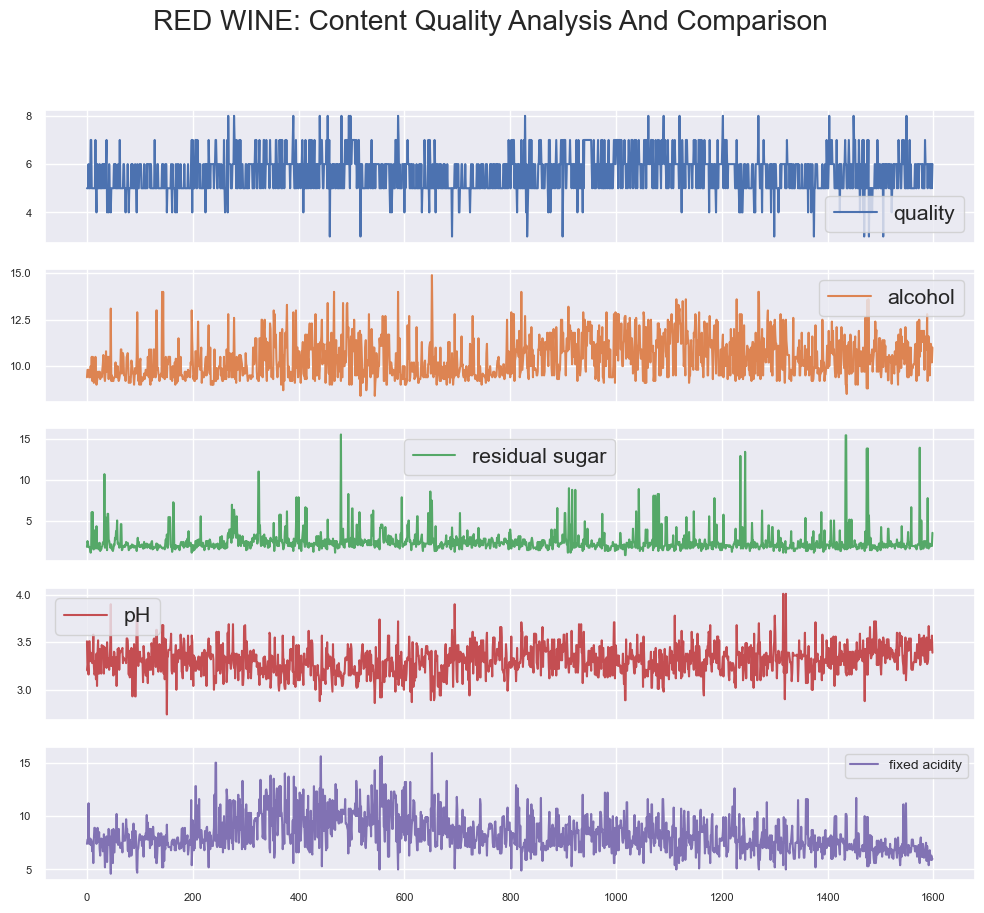

In [506]:
red_wine_components_df.plot(
    title="RED WINE: Content Quality Analysis And Comparison ",
    figsize = (12,10), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

## White Wine Data Exploration and Analysis

In [507]:
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [508]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [509]:
# white wine Data Transposed to sync with the .info above 
w_wine_df = white_wine_df.describe().T 
round(w_wine_df,2)

count    mean    std   min     25%     50%     75%  \
fixed acidity         4898.0    6.85   0.84  3.80    6.30    6.80    7.30   
volatile acidity      4898.0    0.28   0.10  0.08    0.21    0.26    0.32   
citric acid           4898.0    0.33   0.12  0.00    0.27    0.32    0.39   
residual sugar        4898.0    6.39   5.07  0.60    1.70    5.20    9.90   
chlorides             4898.0    0.05   0.02  0.01    0.04    0.04    0.05   
free sulfur dioxide   4898.0   35.31  17.01  2.00   23.00   34.00   46.00   
total sulfur dioxide  4898.0  138.36  42.50  9.00  108.00  134.00  167.00   
density               4898.0    0.99   0.00  0.99    0.99    0.99    1.00   
pH                    4898.0    3.19   0.15  2.72    3.09    3.18    3.28   
sulphates             4898.0    0.49   0.11  0.22    0.41    0.47    0.55   
alcohol               4898.0   10.51   1.23  8.00    9.50   10.40   11.40   
quality               4898.0    5.88   0.89  3.00    5.00    6.00    6.00   

                         max  
fixed acidity          14.20  
volatile acidity        1.10  
citric acid             1.66  
residual sugar         65.80  
chlorides               0.35  
free sulfur dioxide   289.00  
total sulfur dioxide  440.00  
density                 1.04  
pH                      3.82  
sulphates               1.08  
alcohol                14.20  
quality                 9.00

In [510]:
# focusing on the core components that are familiar and easily by average wine drinkers 
white_wine_components_df = pd.DataFrame(white_wine_df, columns=[
     "quality","alcohol","residual sugar","pH","fixed acidity"
    # "citric acid","volatile acidity","chlorides","sulphates"
    ]) 
white_wine_components_df

quality  alcohol  residual sugar    pH  fixed acidity
0           6      8.8            20.7  3.00            7.0
1           6      9.5             1.6  3.30            6.3
2           6     10.1             6.9  3.26            8.1
3           6      9.9             8.5  3.19            7.2
4           6      9.9             8.5  3.19            7.2
...       ...      ...             ...   ...            ...
4893        6     11.2             1.6  3.27            6.2
4894        5      9.6             8.0  3.15            6.6
4895        6      9.4             1.2  2.99            6.5
4896        7     12.8             1.1  3.34            5.5
4897        6     11.8             0.8  3.26            6.0

[4898 rows x 5 columns]

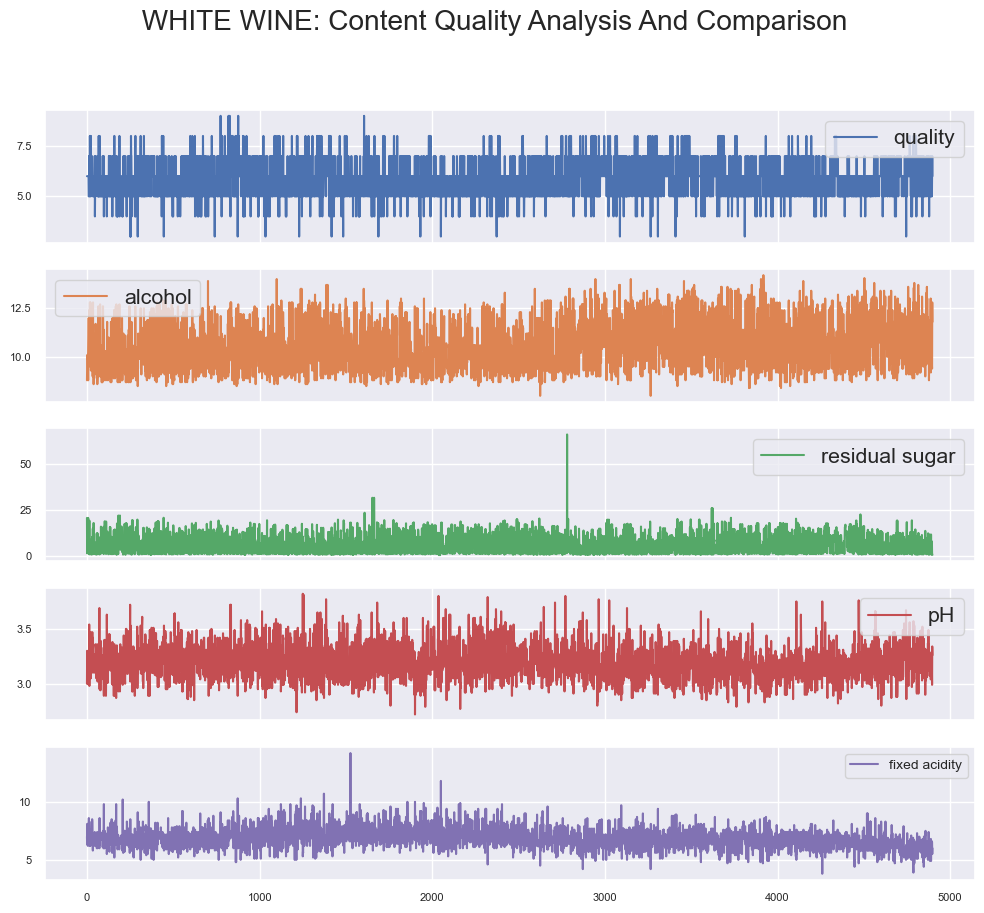

In [511]:
white_wine_components_df.plot(
    title=" WHITE WINE: Content Quality Analysis And Comparison ",
    figsize = (12,10), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [512]:
white_wine_pHa_df = pd.DataFrame(white_wine_df, columns=[
    #"residual sugar","alcohol",,"fixed acidity" "quality","pH", "residual sugar",
    "alcohol","pH"
    ]) 
white_wine_pHa_df

alcohol    pH
0         8.8  3.00
1         9.5  3.30
2        10.1  3.26
3         9.9  3.19
4         9.9  3.19
...       ...   ...
4893     11.2  3.27
4894      9.6  3.15
4895      9.4  2.99
4896     12.8  3.34
4897     11.8  3.26

[4898 rows x 2 columns]

In [513]:
red_wine_conc_df = pd.DataFrame(red_wine_df, columns=[
    "citric acid","volatile acidity","chlorides","sulphates"
    ]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
red_wine_conc_df

citric acid  volatile acidity  chlorides  sulphates
0            0.00             0.700      0.076       0.56
1            0.00             0.880      0.098       0.68
2            0.04             0.760      0.092       0.65
3            0.56             0.280      0.075       0.58
4            0.00             0.700      0.076       0.56
...           ...               ...        ...        ...
1594         0.08             0.600      0.090       0.58
1595         0.10             0.550      0.062       0.76
1596         0.13             0.510      0.076       0.75
1597         0.12             0.645      0.075       0.71
1598         0.47             0.310      0.067       0.66

[1599 rows x 4 columns]

In [514]:
corrlatn = white_wine_pHa_df["alcohol"].corr(white_wine_pHa_df["pH"])

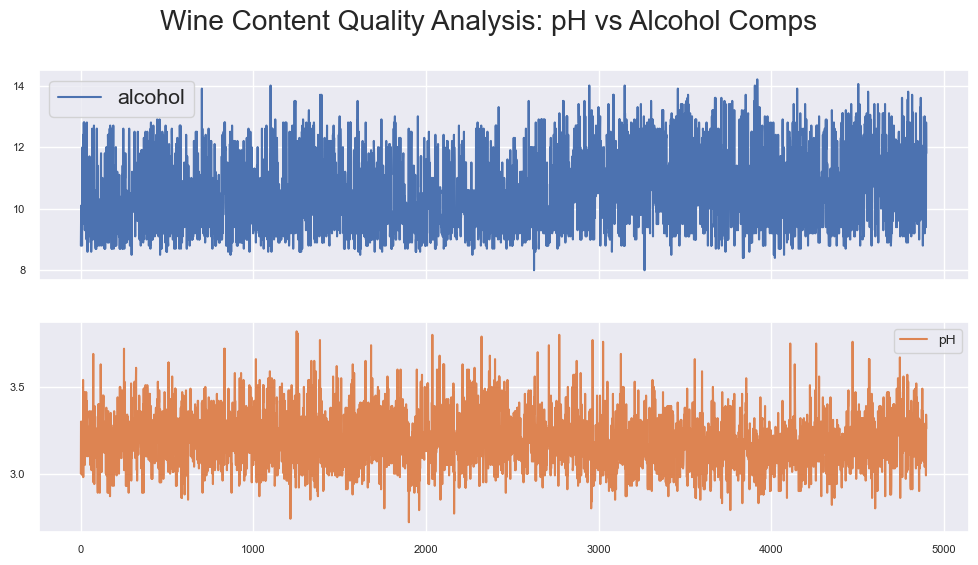

In [515]:
white_wine_pHa_df.plot(
    title="Wine Content Quality Analysis: pH vs Alcohol Comps",
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [516]:
red_wine_df.sort_index()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [517]:
red_wine_df["color"] = "red"  
red_wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality color  
0         9.4        5   red  
1         9.8        5   red  
2         9.8        5   red  
3         9.8        6   red  
4         9.4        5   red  
...       ...      ...   ...  
1594     10.5        5   red  
1595     11.2        6   red  
1596     11.0        6   red  
1597     10.2        5   red  
1598     11.0        6   red  

[1599 rows x 13 columns]

In [518]:
red_wine_pHa_df = pd.DataFrame(red_wine_df, columns=[
    #"residual sugar"]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
    "alcohol","pH"]) 
red_wine_pHa_df

alcohol    pH
0         9.4  3.51
1         9.8  3.20
2         9.8  3.26
3         9.8  3.16
4         9.4  3.51
...       ...   ...
1594     10.5  3.45
1595     11.2  3.52
1596     11.0  3.42
1597     10.2  3.57
1598     11.0  3.39

[1599 rows x 2 columns]

In [519]:
white_wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [520]:
white_wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [521]:
w_wine_df = white_wine_df.describe()
round(w_wine_df,2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    4898.00              4898.00               4898.00  4898.00  4898.00   
mean        0.05                35.31                138.36     0.99     3.19   
std         0.02                17.01                 42.50     0.00     0.15   
min         0.01                 2.00                  9.00     0.99     2.72   
25%         0.04                23.00                108.00     0.99     3.09   
50%         0.04                34.00                134.00     0.99     3.18   
75%         0.05                46.00                167.00     1.00     3.28   
max         0.35               289.00                440.00     1.04     3.82   

       sulphates  alcohol  quality  
count    4898.00  4898.00  4898.00  
mean        0.49    10.51     5.88  
std         0.11     1.23     0.89  
min         0.22     8.00     3.00  
25%         0.41     9.50     5.00  
50%         0.47    10.40     6.00  
75%         0.55    11.40     6.00  
max         1.08    14.20     9.00

In [522]:
w_wine_df.nunique()

fixed acidity           8
volatile acidity        8
citric acid             8
residual sugar          8
chlorides               8
free sulfur dioxide     8
total sulfur dioxide    8
density                 8
pH                      8
sulphates               8
alcohol                 8
quality                 7
dtype: int64

In [523]:
w_wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [524]:
w_wine_missing_count = w_wine_df.isnull().sum()
print(w_wine_missing_count)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [525]:
w_wine_df.iloc[0,0]


4898.0

In [526]:
white_wine_df.sort_index()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [527]:
w_wine_df["color"] = "white"  

In [528]:
round(w_wine_df,2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    4898.00              4898.00               4898.00  4898.00  4898.00   
mean        0.05                35.31                138.36     0.99     3.19   
std         0.02                17.01                 42.50     0.00     0.15   
min         0.01                 2.00                  9.00     0.99     2.72   
25%         0.04                23.00                108.00     0.99     3.09   
50%         0.04                34.00                134.00     0.99     3.18   
75%         0.05                46.00                167.00     1.00     3.28   
max         0.35               289.00                440.00     1.04     3.82   

       sulphates  alcohol  quality  color  
count    4898.00  4898.00  4898.00  white  
mean        0.49    10.51     5.88  white  
std         0.11     1.23     0.89  white  
min         0.22     8.00     3.00  white  
25%         0.41     9.50     5.00  white  
50%         0.47    10.40     6.00  white  
75%         0.55    11.40     6.00  white  
max         1.08    14.20     9.00  white

In [529]:
w_wine_df_copy = w_wine_df.copy()
w_wine_df_copy

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  color  
count  4898.000000  4898.000000  4898.000000  4898.000000  white  
mean      3.188267     0.489847    10.514267     5.877909  white  
std       0.151001     0.114126     1.230621     0.885639  white  
min       2.720000     0.220000     8.000000     3.000000  white  
25%       3.090000     0.410000     9.500000     5.000000  white  
50%       3.180000     0.470000    10.400000     6.000000  white  
75%       3.280000     0.550000    11.400000     6.000000  white  
max       3.820000     1.080000    14.200000     9.000000  white

## Combined Wine df: Combining red wine and white wine datasets for deeper analysis

In [530]:
combined_wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True, sort=False)
combined_wine_df 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality color  
0         9.4        5   red  
1         9.8        5   red  
2         9.8        5   red  
3         9.8        6   red  
4         9.4        5   red  
...       ...      ...   ...  
6492     11.2        6   NaN  
6493      9.6        5   NaN  
6494      9.4        6   NaN  
6495     12.8        7   NaN  
6496     11.8        6   NaN  

[6497 rows x 13 columns]

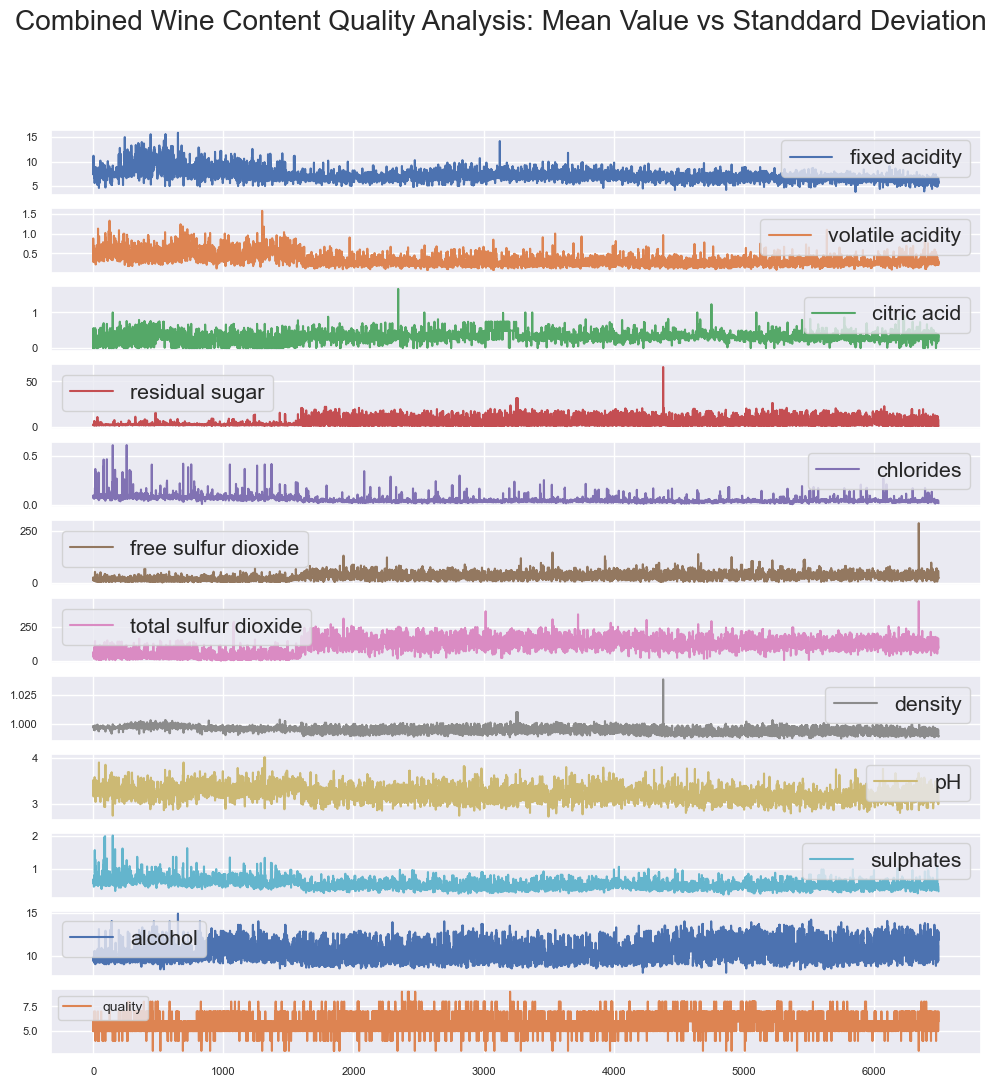

In [531]:
combined_wine_df.plot(
    title="Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation",
    figsize = (12,12), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [532]:
combined_wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [533]:
combined_wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [534]:
combined_wine_df.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     1
dtype: int64

In [535]:
combined_wine_missing_count_df = combined_wine_df.isnull().sum()
print(combined_wine_missing_count_df)

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
color                   4898
dtype: int64


In [536]:
combined_wine_df.describe().T #loc[: , ["mean", "std"]] ## mean and std

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [537]:
combined_mean_std_df = combined_wine_df.describe().T.loc[: , ["mean", "std"]]
combined_mean_std_df 

mean        std
fixed acidity           7.215307   1.296434
volatile acidity        0.339666   0.164636
citric acid             0.318633   0.145318
residual sugar          5.443235   4.757804
chlorides               0.056034   0.035034
free sulfur dioxide    30.525319  17.749400
total sulfur dioxide  115.744574  56.521855
density                 0.994697   0.002999
pH                      3.218501   0.160787
sulphates               0.531268   0.148806
alcohol                10.491801   1.192712
quality                 5.818378   0.873255

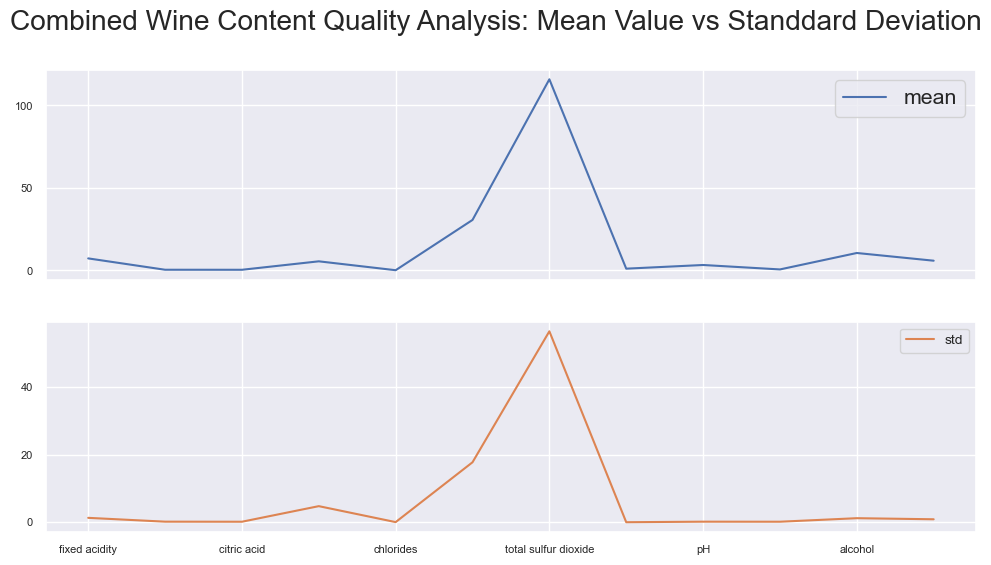

In [538]:
combined_mean_std_df.plot(
    title="Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation",
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [539]:
# combined_mean_std_df.plot.scatter(x = "std", y = "mean", 
#         #title="Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation",
#         figsize = (12,6) , s = 50, fontsize = 15)

<Axes: title={'center': 'Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation'}, xlabel='std', ylabel='mean'>

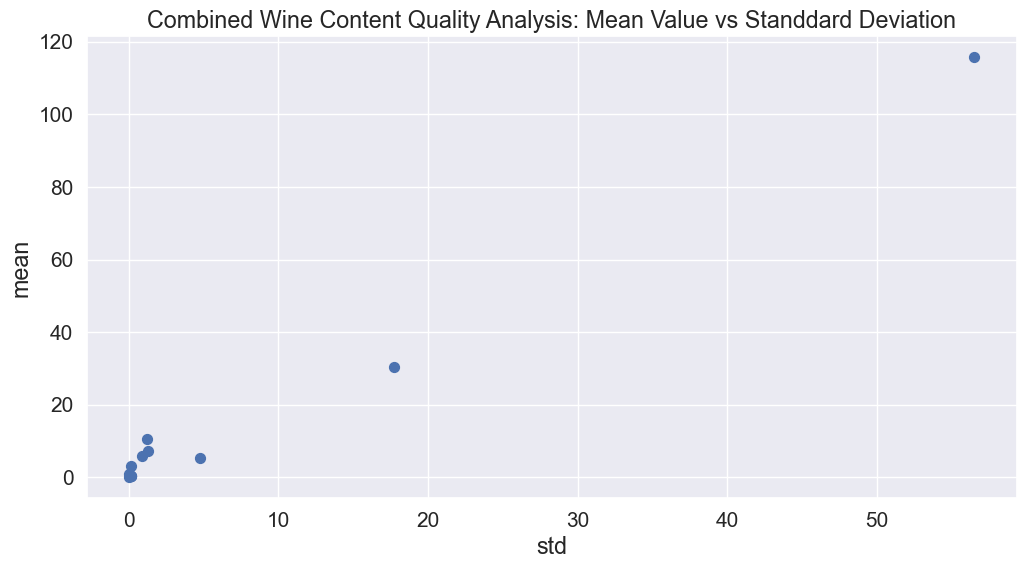

In [540]:
combined_mean_std_df.plot.scatter(x = "std", y = "mean", 
        title="Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation",
        figsize = (12,6) , s = 50, fontsize = 15)

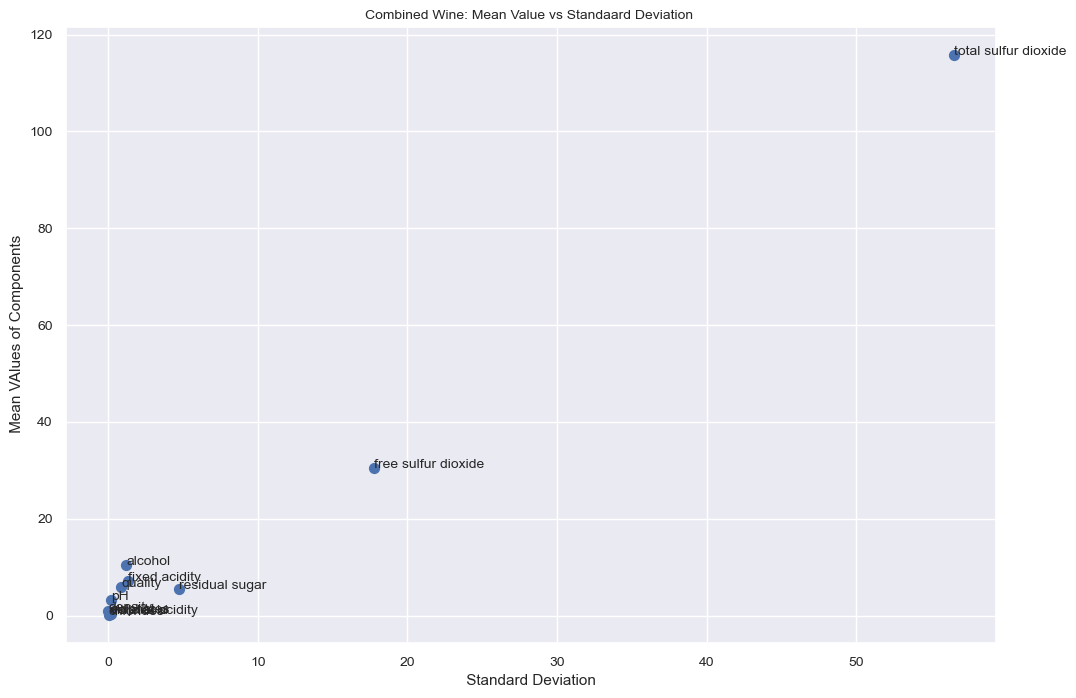

In [541]:
combined_mean_std_df.plot.scatter(x = "std", y = "mean", figsize = (12,8) , s = 50, fontsize = 10)
for i in combined_mean_std_df.index:
    plt.annotate( i, xy = (combined_mean_std_df.loc[i, "std"]+0.002, 
                           combined_mean_std_df.loc[i,"mean"]+0.002 ), size = 10 )
    plt.xlabel(" Standard Deviation " , fontsize = 11)
    plt.ylabel(" Mean VAlues of Components" , fontsize = 11)
    plt.title("Combined Wine: Mean Value vs Standaard Deviation " , fontsize = 10)
   # plt.show()

In [542]:
combined_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [546]:
combined_pHa_df = pd.DataFrame(combined_wine_df, columns=[
    #"residual sugar"]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
    "alcohol"]) #"quality"]) 
combined_pHa_df

alcohol
0         9.4
1         9.8
2         9.8
3         9.8
4         9.4
...       ...
6492     11.2
6493      9.6
6494      9.4
6495     12.8
6496     11.8

[6497 rows x 1 columns]

In [547]:
# combined_pHa_df.cov()

alcohol
alcohol  1.422561

In [551]:
combined_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [553]:
# combined_wine_df.cov()

In [631]:
# import seaborn as sns
# plt.figure(figsize = (12, 8))
# sns.set(font_scale = 1.4)
# #sns.heatmap(ret.corr(), cmap="Greens", annot=True, annot_kws={"size":15}, vmax=0.60)
# sns.heatmap(combined_pHa_df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
# plt.show()

In [443]:
# combined_pHa_df.plot.scatter(x = "pH", y = "alcohol", 
#         title="Combined Wine Content Quality Analysis: Mean Value vs Standdard Deviation",
#         figsize = (12,6) , s = 50, fontsize = 15)

In [398]:
# combined_pHa_df.plot(
#     title="Combined Wine Content Quality Analysis: Alcohol vs pH",
#     figsize = (12,6), 
#     fontsize = 8,
#     subplots=True
#     )
# plt.legend(fontsize = 10)
# plt.show()

In [399]:
combined_pHa_df = combined_pHa_df.describe().T
round(combined_pHa_df,2)

count   mean   std   min   25%    50%    75%    max
alcohol  6497.0  10.49  1.19  8.00  9.50  10.30  11.30  14.90
pH       6497.0   3.22  0.16  2.72  3.11   3.21   3.32   4.01

In [400]:
combined_ar_df = pd.DataFrame(combined_wine_df, columns=[
    "alcohol","residual sugar"]) ##"residual sugar"]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
combined_ar_df

alcohol  residual sugar
0         9.4             1.9
1         9.8             2.6
2         9.8             2.3
3         9.8             1.9
4         9.4             1.9
...       ...             ...
6492     11.2             1.6
6493      9.6             8.0
6494      9.4             1.2
6495     12.8             1.1
6496     11.8             0.8

[6497 rows x 2 columns]

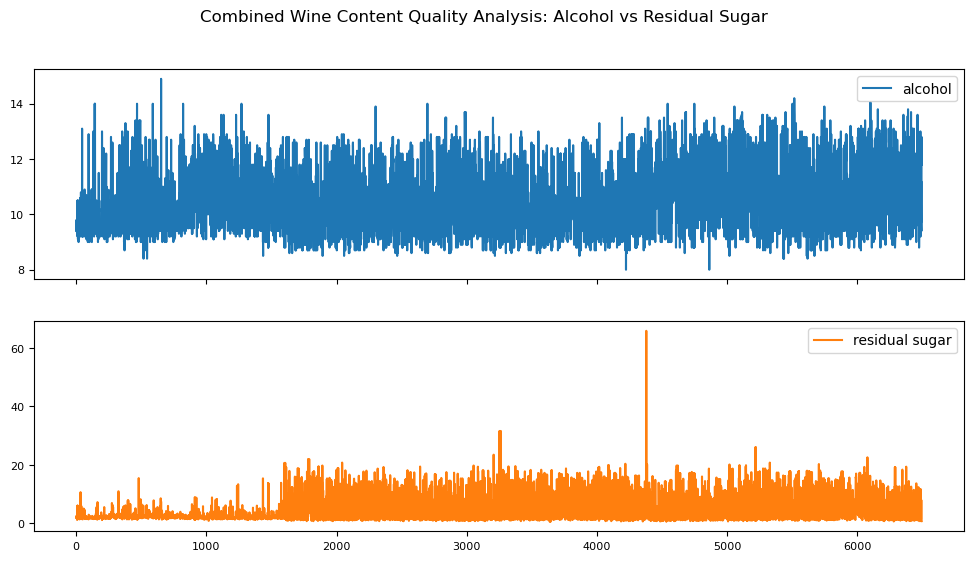

In [401]:
combined_ar_df.plot(
    title="Combined Wine Content Quality Analysis: Alcohol vs Residual Sugar",
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [402]:
combined_rs_df = pd.DataFrame(combined_wine_df,columns=[
    "residual sugar"]) #"alcohol",,"fixed acidity" "quality","pH", "residual sugar","pH"]) 
combined_rs_df 

residual sugar
0                1.9
1                2.6
2                2.3
3                1.9
4                1.9
...              ...
6492             1.6
6493             8.0
6494             1.2
6495             1.1
6496             0.8

[6497 rows x 1 columns]

In [403]:
res_sugar_df = combined_rs_df.describe()
round(res_sugar_df,2).T

count  mean   std  min  25%  50%  75%   max
residual sugar  6497.0  5.44  4.76  0.6  1.8  3.0  8.1  65.8

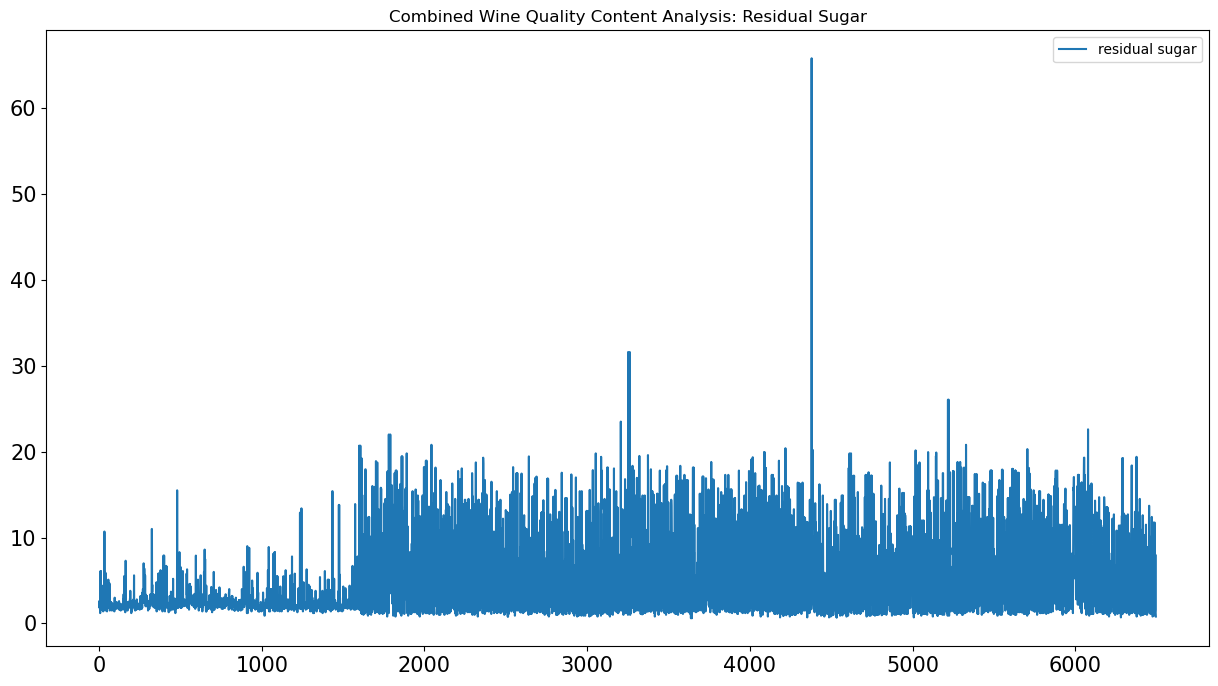

In [404]:
combined_rs_df.plot(title="Combined Wine Quality Content Analysis: Residual Sugar", figsize = (15,8), fontsize = 15)
plt.legend(fontsize = 10 )
plt.show()

In [405]:
combined_wine_ca_va_df = pd.DataFrame(combined_wine_df, columns=[
    "citric acid","volatile acidity"]) #.head()
combined_wine_ca_va_df


citric acid  volatile acidity
0            0.00              0.70
1            0.00              0.88
2            0.04              0.76
3            0.56              0.28
4            0.00              0.70
...           ...               ...
6492         0.29              0.21
6493         0.36              0.32
6494         0.19              0.24
6495         0.30              0.29
6496         0.38              0.21

[6497 rows x 2 columns]

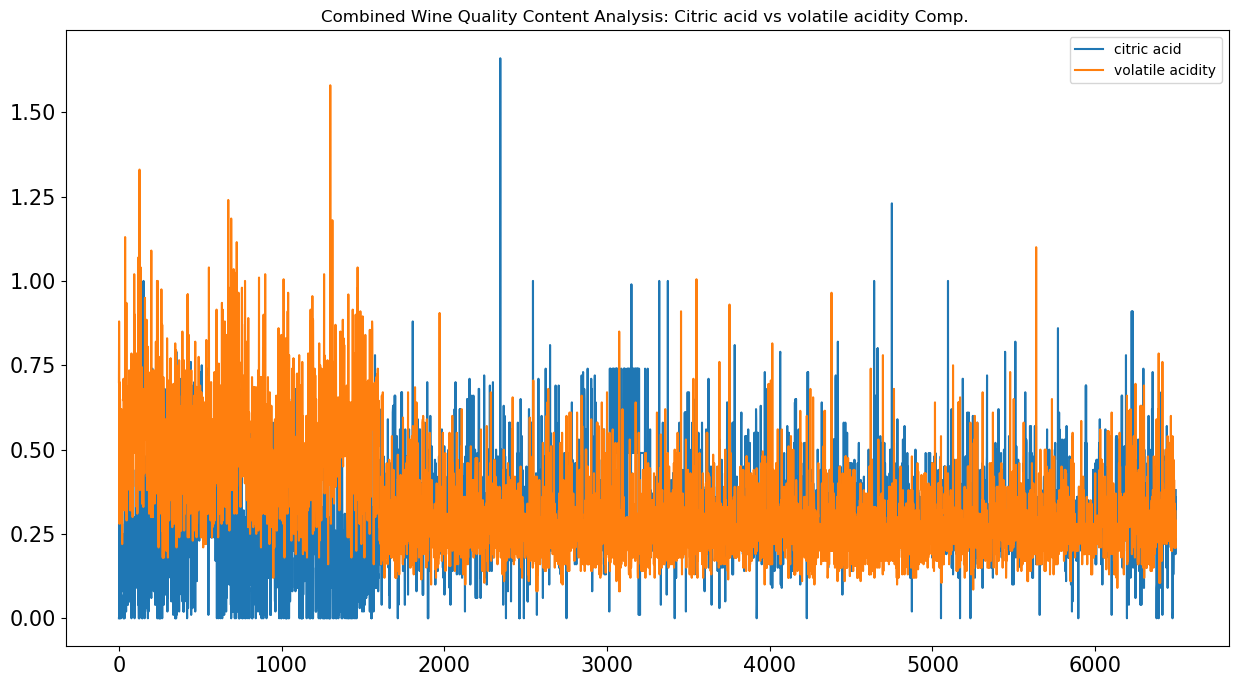

In [406]:
combined_wine_ca_va_df.plot(title="Combined Wine Quality Content Analysis: Citric acid vs volatile acidity Comp. ", figsize = (15,8), fontsize = 15)
plt.legend(fontsize = 10 )
plt.show()

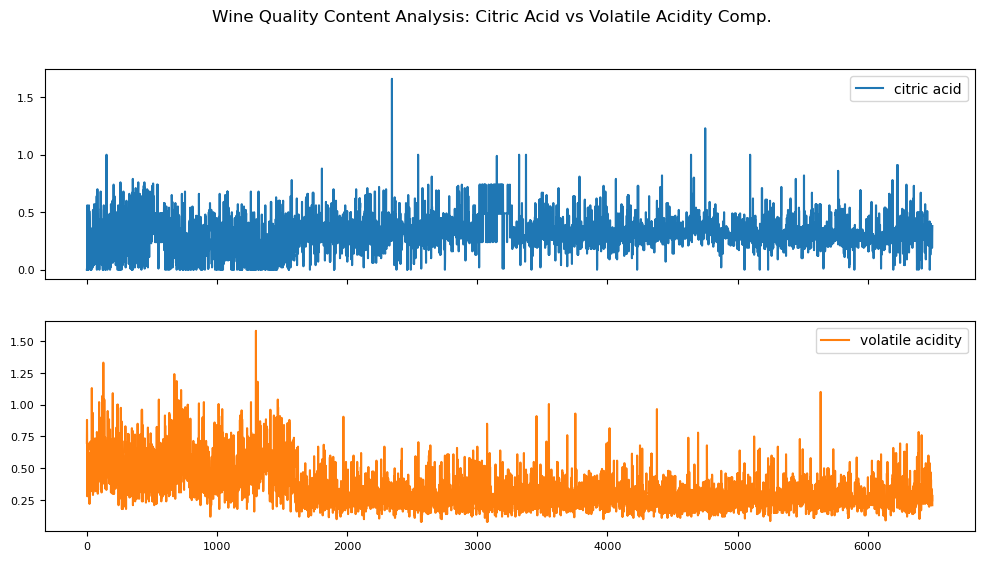

In [407]:
combined_wine_ca_va_df.plot(title="Wine Quality Content Analysis: Citric Acid vs Volatile Acidity Comp. ",
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [408]:
combined_wine_df_copy = combined_wine_df.copy()
combined_wine_df_copy

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality color  
0         9.4        5   red  
1         9.8        5   red  
2         9.8        5   red  
3         9.8        6   red  
4         9.4        5   red  
...       ...      ...   ...  
6492     11.2        6   NaN  
6493      9.6        5   NaN  
6494      9.4        6   NaN  
6495     12.8        7   NaN  
6496     11.8        6   NaN  

[6497 rows x 13 columns]

In [409]:
combined_wine_df.columns #_copy.sort_values(by= ["quality"], ascending=False)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [410]:
# combined_wine_df_i = combined_wine_df.iloc[0,0]

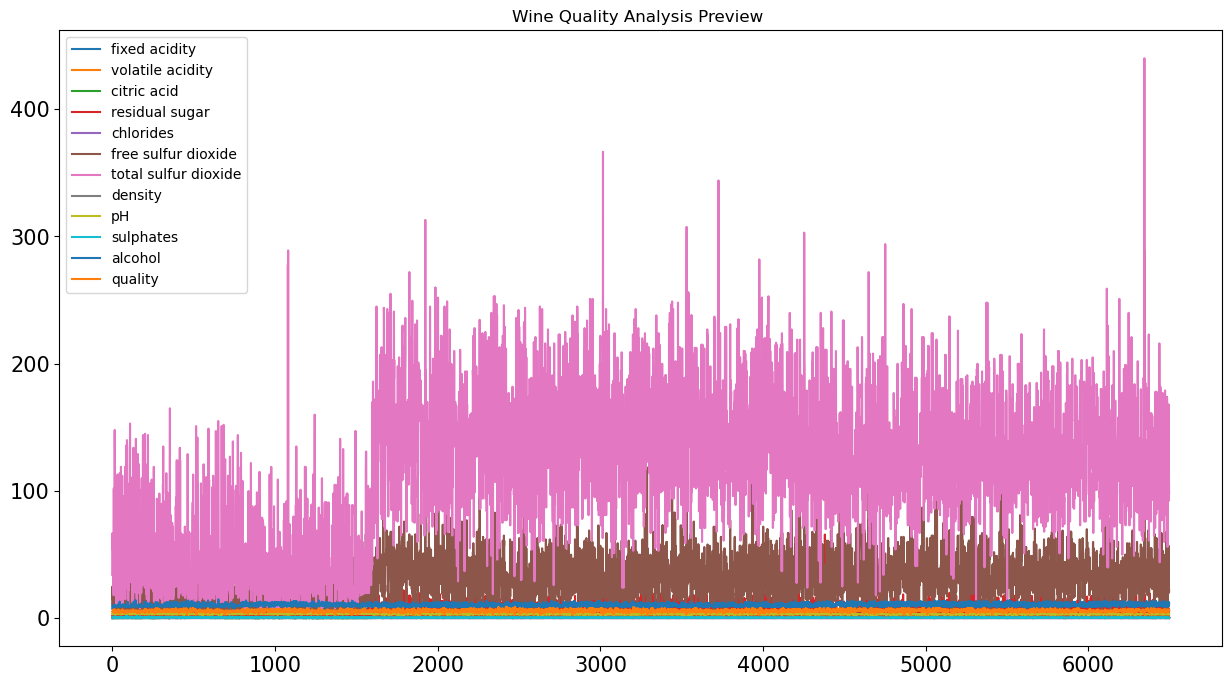

In [411]:
combined_wine_df.plot(title="Wine Quality Analysis Preview ", figsize = (15,8), fontsize = 15)
plt.legend(fontsize = 10 )
plt.show()

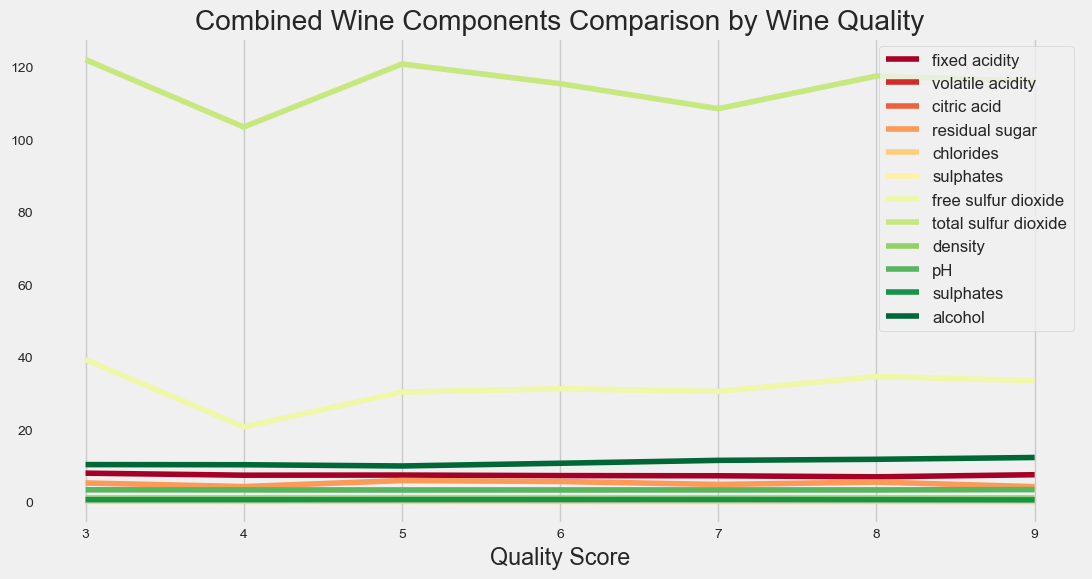

In [691]:
combined_wine_df.groupby('quality')[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","sulphates","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"
  ]].mean().plot(kind='line',cmap="RdYlGn",figsize=(12, 6),fontsize=10)
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 12)
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()

In [412]:
# combined_wine_ca_va_df = pd.DataFrame(combined_wine_df, columns=[
#     "citric acid","volatile acidity"]) #.head()
# combined_wine_ca_va_df

### All the components minus the citric acid and volatile Acidiity Components 
combined_traces_comps_df = pd.DataFrame(combined_wine_df, columns=[
    "alcohol","fixed acidity"#,"quality"
    #"chlorides","sulphates","alcohol","fixed acidity","quality ","pH" #, "residual sugar"
    ]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
combined_traces_comps_df

alcohol  fixed acidity
0         9.4            7.4
1         9.8            7.8
2         9.8            7.8
3         9.8           11.2
4         9.4            7.4
...       ...            ...
6492     11.2            6.2
6493      9.6            6.6
6494      9.4            6.5
6495     12.8            5.5
6496     11.8            6.0

[6497 rows x 2 columns]

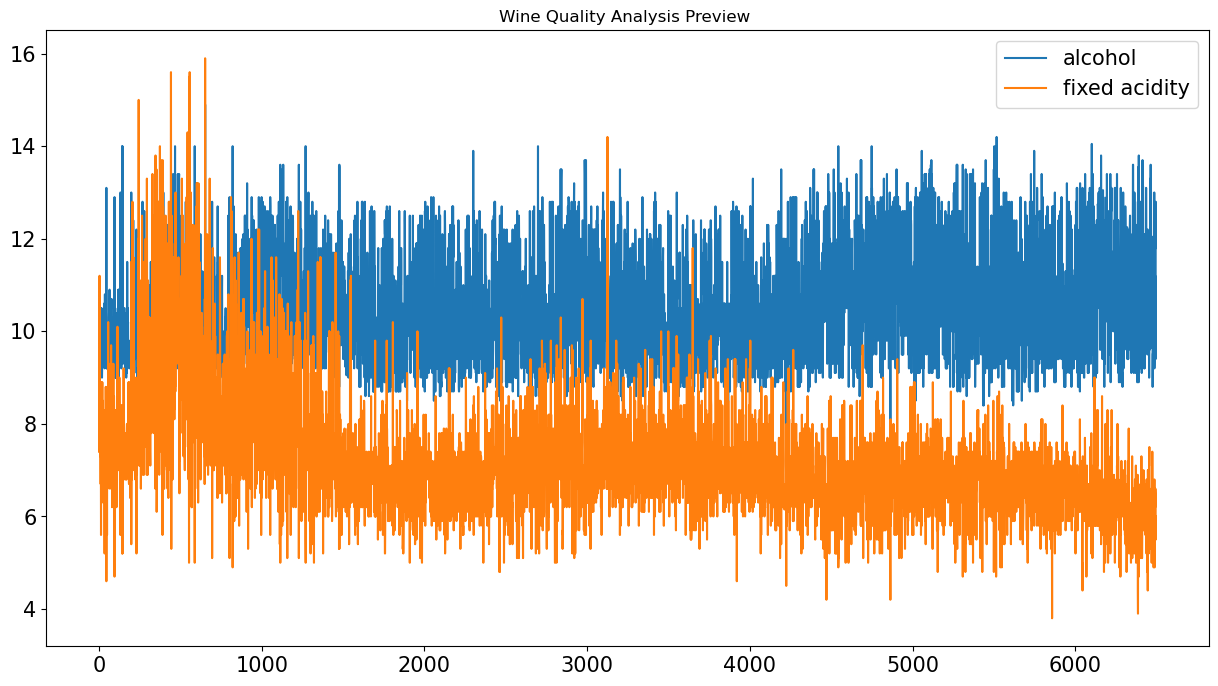

In [413]:
combined_traces_comps_df.plot(title="Wine Quality Analysis Preview ", figsize = (15,8), fontsize = 15)
plt.legend(fontsize = 15 )
plt.show()

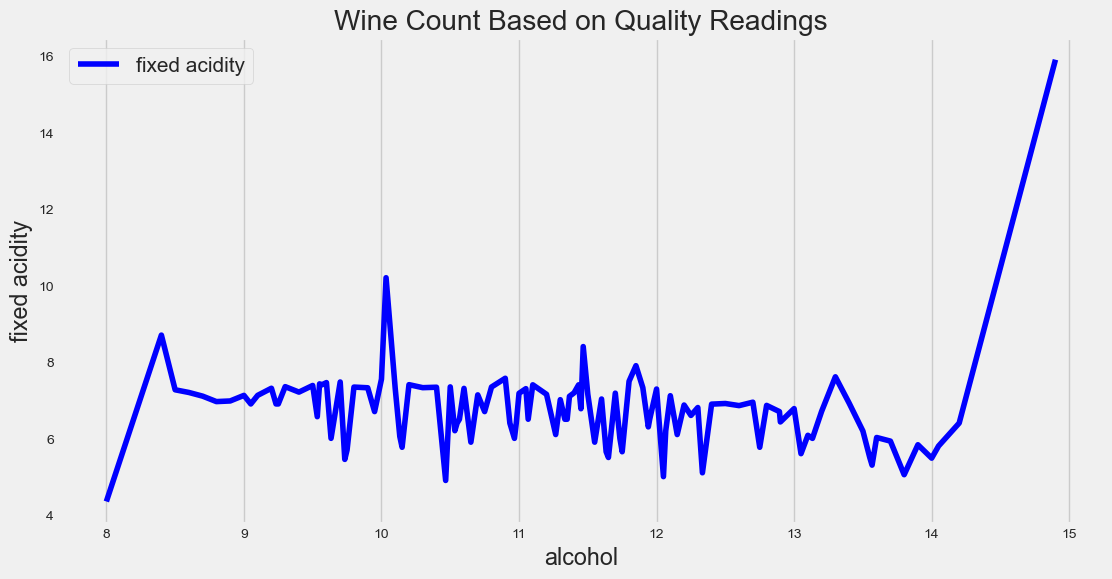

In [698]:
combined_wine_df.groupby('alcohol')['fixed acidity'].mean().plot(kind='line', color='blue',figsize=(12,6), fontsize=10)
plt.title('Wine Count Based on Quality Readings')
plt.ylabel('Free Sulfur Dioxide Levels')
plt.style.use("fivethirtyeight")
plt.ylabel('fixed acidity' )
plt.xlabel('alcohol') #SQuality Score')
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

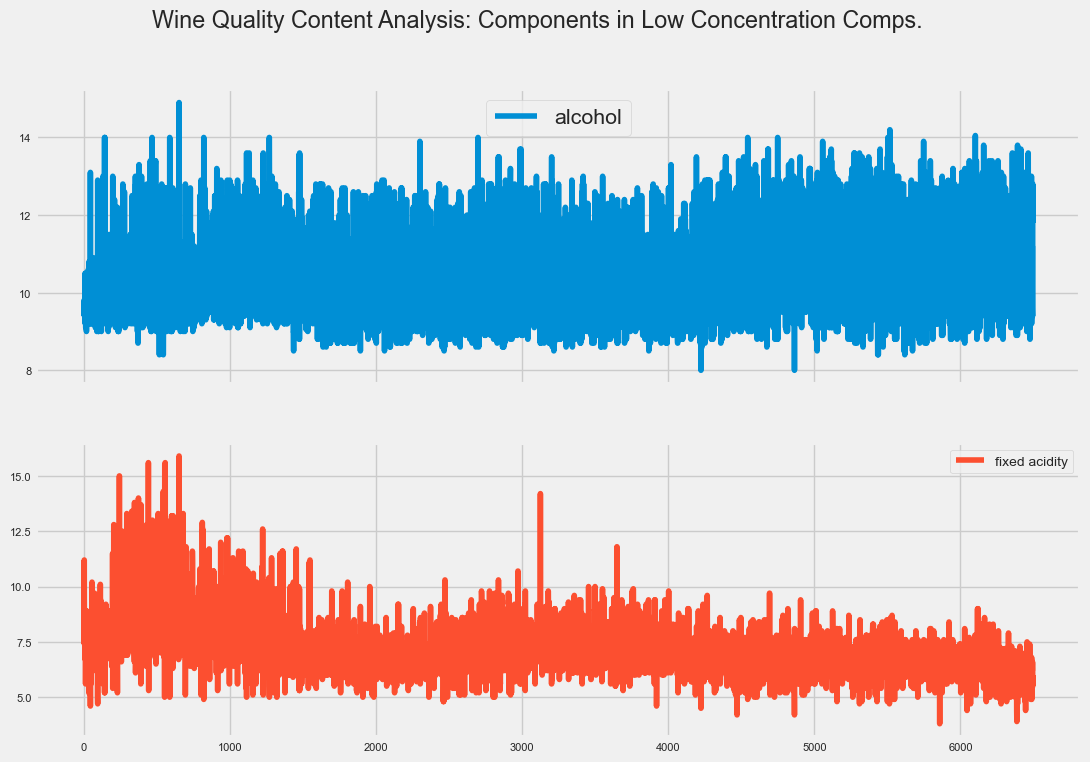

In [701]:
combined_traces_comps_df.plot(title="Wine Quality Content Analysis: Components in Low Concentration Comps. ",
    figsize = (12,8), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [415]:
combined_low_conc_df = pd.DataFrame(combined_wine_df, columns=[
    "citric acid","volatile acidity","chlorides","sulphates"]) #.head()"alcohol",,"fixed acidity" "quality","pH", "residual sugar",
combined_low_conc_df

citric acid  volatile acidity  chlorides  sulphates
0            0.00              0.70      0.076       0.56
1            0.00              0.88      0.098       0.68
2            0.04              0.76      0.092       0.65
3            0.56              0.28      0.075       0.58
4            0.00              0.70      0.076       0.56
...           ...               ...        ...        ...
6492         0.29              0.21      0.039       0.50
6493         0.36              0.32      0.047       0.46
6494         0.19              0.24      0.041       0.46
6495         0.30              0.29      0.022       0.38
6496         0.38              0.21      0.020       0.32

[6497 rows x 4 columns]

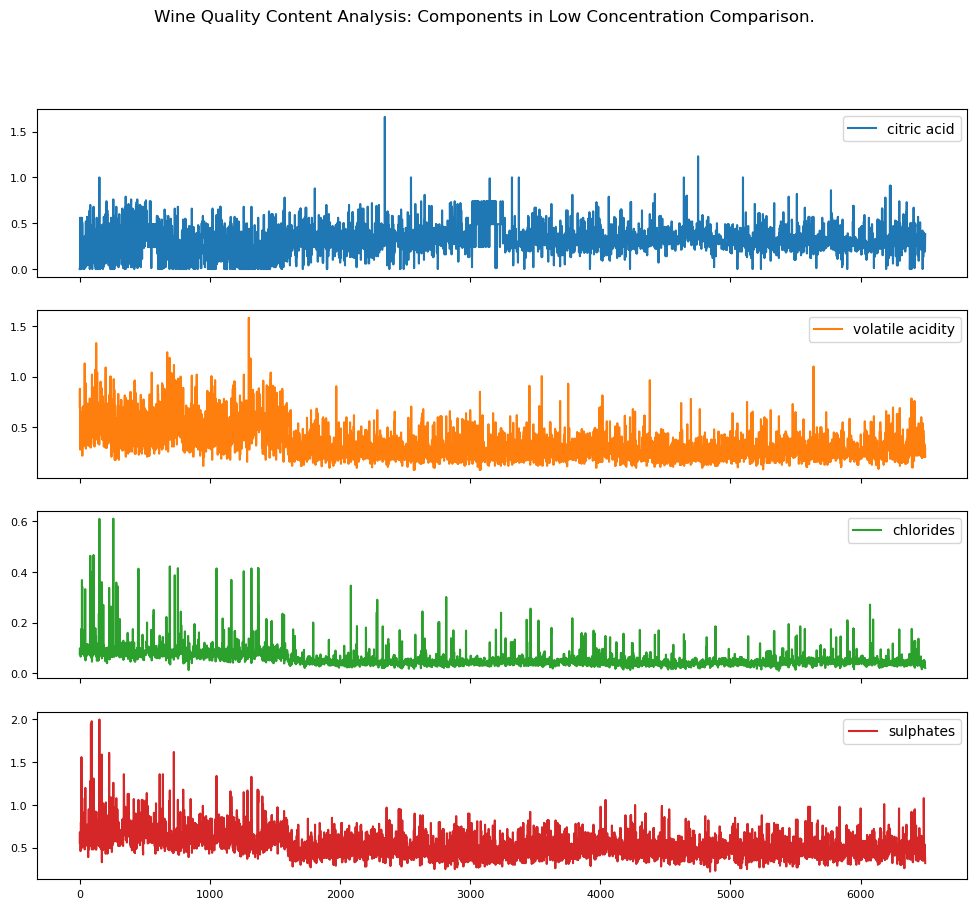

In [431]:
combined_low_conc_df.plot(title="Wine Quality Content Analysis: Components in Low Concentration Comparison. ",
    figsize = (12,10), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [417]:
combined_high_relative_conc_df = pd.DataFrame(combined_wine_df, columns=[
      "quality","alcohol", "pH", "residual sugar"
      #"fixed acidity","citric acid","volatile acidity","chlorides","sulphates","total sulfur dioxide"
      ]) 
combined_high_relative_conc_df

quality  alcohol    pH  residual sugar
0           5      9.4  3.51             1.9
1           5      9.8  3.20             2.6
2           5      9.8  3.26             2.3
3           6      9.8  3.16             1.9
4           5      9.4  3.51             1.9
...       ...      ...   ...             ...
6492        6     11.2  3.27             1.6
6493        5      9.6  3.15             8.0
6494        6      9.4  2.99             1.2
6495        7     12.8  3.34             1.1
6496        6     11.8  3.26             0.8

[6497 rows x 4 columns]

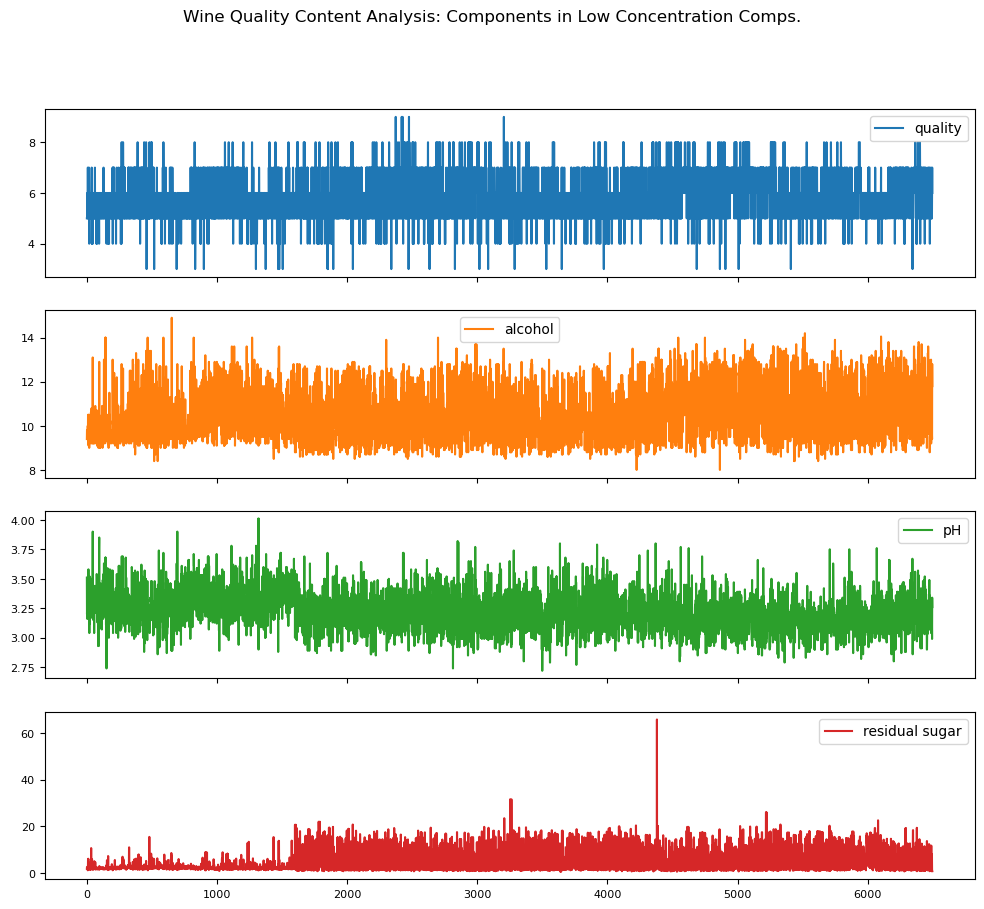

In [418]:
combined_high_relative_conc_df.plot(title="Wine Quality Content Analysis: Components in Low Concentration Comps. ",
    figsize = (12,10), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [419]:
wine_index_df = combined_wine_df.set_index("quality")#.value_counts().sort_index()
wine_index_df

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
5                  7.4              0.70         0.00             1.9   
5                  7.8              0.88         0.00             2.6   
5                  7.8              0.76         0.04             2.3   
6                 11.2              0.28         0.56             1.9   
5                  7.4              0.70         0.00             1.9   
...                ...               ...          ...             ...   
6                  6.2              0.21         0.29             1.6   
5                  6.6              0.32         0.36             8.0   
6                  6.5              0.24         0.19             1.2   
7                  5.5              0.29         0.30             1.1   
6                  6.0              0.21         0.38             0.8   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
5            0.076                 11.0                  34.0  0.99780  3.51   
5            0.098                 25.0                  67.0  0.99680  3.20   
5            0.092                 15.0                  54.0  0.99700  3.26   
6            0.075                 17.0                  60.0  0.99800  3.16   
5            0.076                 11.0                  34.0  0.99780  3.51   
...            ...                  ...                   ...      ...   ...   
6            0.039                 24.0                  92.0  0.99114  3.27   
5            0.047                 57.0                 168.0  0.99490  3.15   
6            0.041                 30.0                 111.0  0.99254  2.99   
7            0.022                 20.0                 110.0  0.98869  3.34   
6            0.020                 22.0                  98.0  0.98941  3.26   

         sulphates  alcohol color  
quality                            
5             0.56      9.4   red  
5             0.68      9.8   red  
5             0.65      9.8   red  
6             0.58      9.8   red  
5             0.56      9.4   red  
...            ...      ...   ...  
6             0.50     11.2   NaN  
5             0.46      9.6   NaN  
6             0.46      9.4   NaN  
7             0.38     12.8   NaN  
6             0.32     11.8   NaN  

[6497 rows x 12 columns]

In [702]:
combined_wine_index_df = pd.DataFrame(wine_index_df, columns=[
      "alcohol","pH","residual sugar","fixed acidity","citric acid","volatile acidity","chlorides","sulphates","total sulfur dioxide","free sulfur dioxide"
      ]) 
combined_wine_index_df.head()

alcohol    pH  residual sugar  fixed acidity  citric acid  \
quality                                                              
5            9.4  3.51             1.9            7.4         0.00   
5            9.8  3.20             2.6            7.8         0.00   
5            9.8  3.26             2.3            7.8         0.04   
6            9.8  3.16             1.9           11.2         0.56   
5            9.4  3.51             1.9            7.4         0.00   

         volatile acidity  chlorides  sulphates  total sulfur dioxide  \
quality                                                                 
5                    0.70      0.076       0.56                  34.0   
5                    0.88      0.098       0.68                  67.0   
5                    0.76      0.092       0.65                  54.0   
6                    0.28      0.075       0.58                  60.0   
5                    0.70      0.076       0.56                  34.0   

         free sulfur dioxide  
quality                       
5                       11.0  
5                       25.0  
5                       15.0  
6                       17.0  
5                       11.0

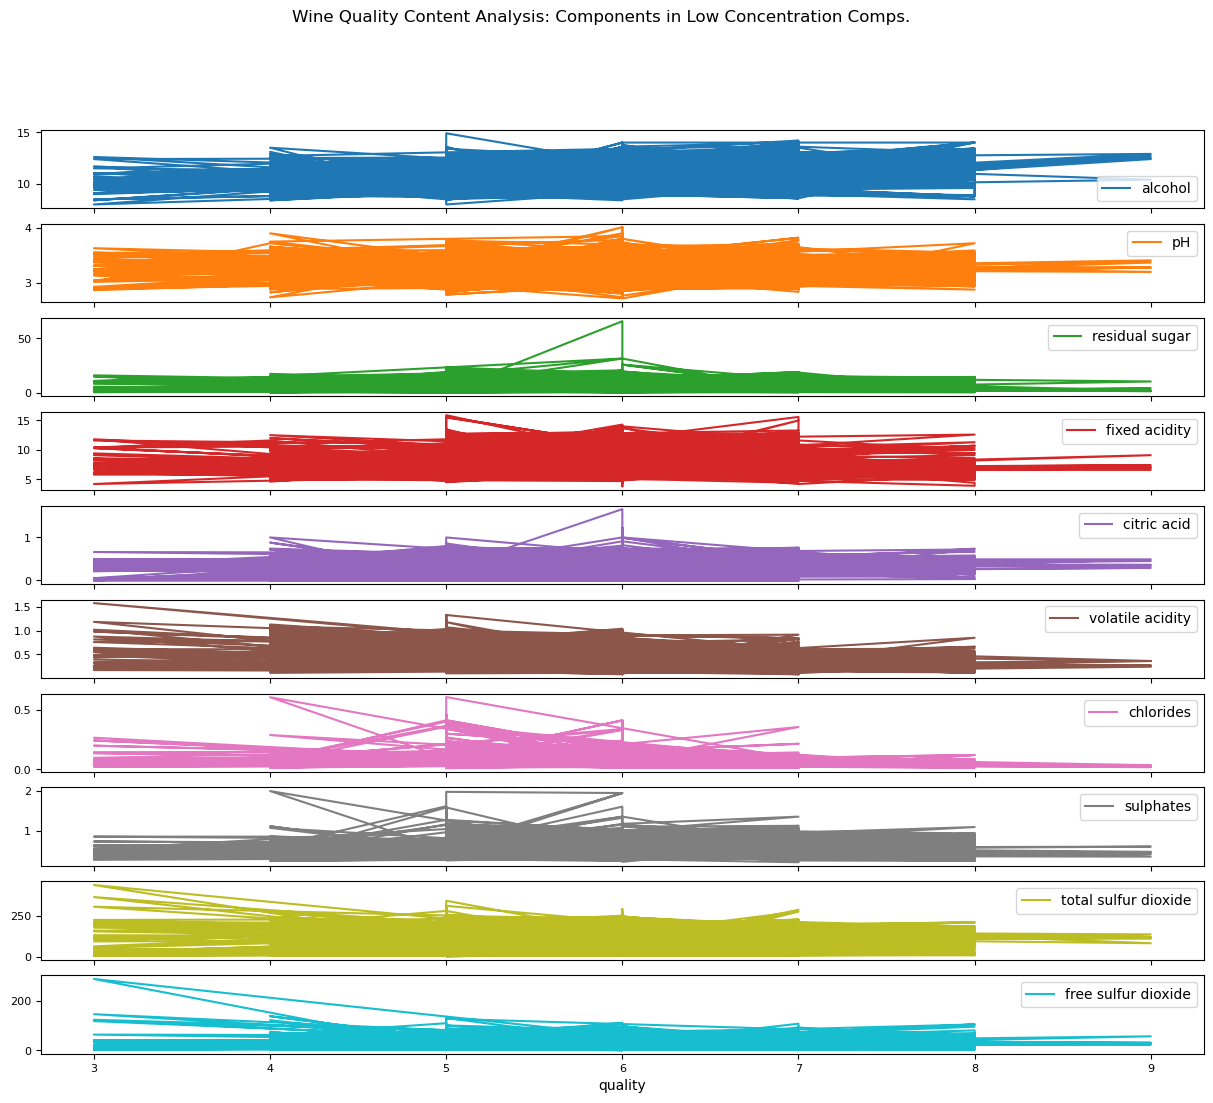

In [421]:
combined_wine_index_df.plot(title="Wine Quality Content Analysis: Components in Low Concentration Comps. ",
    figsize = (15,12), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

In [423]:
combined_wine_chloride_df = pd.DataFrame(wine_index_df, columns=[
      #"alcohol","pH","residual sugar","fixed acidity","citric acid","volatile acidity",
      "chlorides" #,"sulphates","total sulfur dioxide","free sulfur dioxide"
      ]) 
combined_wine_chloride_df.T

quality        5      5      5      6      5      5      5      7      7  \
chlorides  0.076  0.098  0.092  0.075  0.076  0.075  0.069  0.065  0.073   

quality        5  ...      5     6      6      6      5      6      5      6  \
chlorides  0.071  ...  0.052  0.03  0.036  0.038  0.032  0.039  0.047  0.041   

quality        7     6  
chlorides  0.022  0.02  

[1 rows x 6497 columns]

In [554]:
combined_wine_index_df.head()

alcohol    pH  residual sugar  fixed acidity  citric acid  \
quality                                                              
5            9.4  3.51             1.9            7.4         0.00   
5            9.8  3.20             2.6            7.8         0.00   
5            9.8  3.26             2.3            7.8         0.04   
6            9.8  3.16             1.9           11.2         0.56   
5            9.4  3.51             1.9            7.4         0.00   

         volatile acidity  chlorides  sulphates  total sulfur dioxide  \
quality                                                                 
5                    0.70      0.076       0.56                  34.0   
5                    0.88      0.098       0.68                  67.0   
5                    0.76      0.092       0.65                  54.0   
6                    0.28      0.075       0.58                  60.0   
5                    0.70      0.076       0.56                  34.0   

         free sulfur dioxide  
quality                       
5                       11.0  
5                       25.0  
5                       15.0  
6                       17.0  
5                       11.0

In [555]:
combined_wine_index_df.cov()

alcohol        pH  residual sugar  fixed acidity  \
alcohol                1.422561  0.023252       -2.039567      -0.147594   
pH                     0.023252  0.025853       -0.204498      -0.052675   
residual sugar        -2.039567 -0.204498       22.636696      -0.690720   
fixed acidity         -0.147594 -0.052675       -0.690720       1.680740   
citric acid           -0.001819 -0.007706        0.098490       0.061122   
volatile acidity      -0.007391  0.006921       -0.153537       0.046745   
chlorides             -0.010735  0.000252       -0.021492       0.013544   
sulphates             -0.000538  0.004597       -0.131635       0.057792   
total sulfur dioxide -17.914646 -2.166696      133.244854     -24.112030   
free sulfur dioxide   -3.807165 -0.416249       34.021685      -6.506003   

                      citric acid  volatile acidity  chlorides  sulphates  \
alcohol                 -0.001819         -0.007391  -0.010735  -0.000538   
pH                      -0.007706          0.006921   0.000252   0.004597   
residual sugar           0.098490         -0.153537  -0.021492  -0.131635   
fixed acidity            0.061122          0.046745   0.013544   0.057792   
citric acid              0.021117         -0.009043   0.000199   0.001215   
volatile acidity        -0.009043          0.027105   0.002175   0.005536   
chlorides                0.000199          0.002175   0.001227   0.002062   
sulphates                0.001215          0.005536   0.002062   0.022143   
total sulfur dioxide     1.603646         -3.856933  -0.553714  -2.319079   
free sulfur dioxide      0.343372         -1.030242  -0.121284  -0.497756   

                      total sulfur dioxide  free sulfur dioxide  
alcohol                         -17.914646            -3.807165  
pH                               -2.166696            -0.416249  
residual sugar                  133.244854            34.021685  
fixed acidity                   -24.112030            -6.506003  
citric acid                       1.603646             0.343372  
volatile acidity                 -3.856933            -1.030242  
chlorides                        -0.553714            -0.121284  
sulphates                        -2.319079            -0.497756  
total sulfur dioxide           3194.720039           723.261972  
free sulfur dioxide             723.261972           315.041192

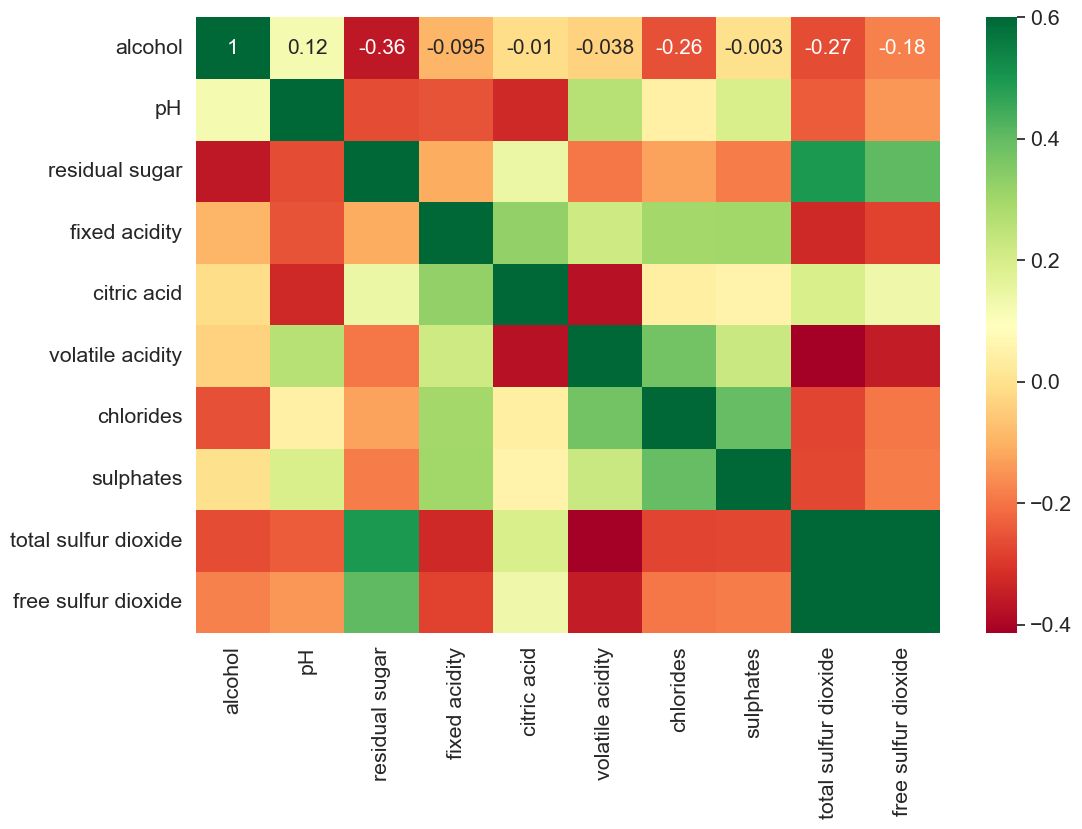

In [557]:

import seaborn as sns
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.4)
#sns.heatmap(ret.corr(), cmap="Greens", annot=True, annot_kws={"size":15}, vmax=0.60)
sns.heatmap(combined_wine_index_df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

In [561]:
wine_index_alcohol_df = combined_wine_df.set_index("alcohol")#.value_counts().sort_index()
wine_index_alcohol_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
alcohol                                                                 
9.4                7.4              0.70         0.00             1.9   
9.8                7.8              0.88         0.00             2.6   
9.8                7.8              0.76         0.04             2.3   
9.8               11.2              0.28         0.56             1.9   
9.4                7.4              0.70         0.00             1.9   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
alcohol                                                                        
9.4          0.076                 11.0                  34.0   0.9978  3.51   
9.8          0.098                 25.0                  67.0   0.9968  3.20   
9.8          0.092                 15.0                  54.0   0.9970  3.26   
9.8          0.075                 17.0                  60.0   0.9980  3.16   
9.4          0.076                 11.0                  34.0   0.9978  3.51   

         sulphates  quality color  
alcohol                            
9.4           0.56        5   red  
9.8           0.68        5   red  
9.8           0.65        5   red  
9.8           0.58        6   red  
9.4           0.56        5   red

In [566]:
# import seaborn as sns
# plt.figure(figsize = (12, 8))
# sns.set(font_scale = 1.4)
# #sns.heatmap(ret.corr(), cmap="Greens", annot=True, annot_kws={"size":15}, vmax=0.60)
# sns.heatmap(combined_wine_index_df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
# plt.show()

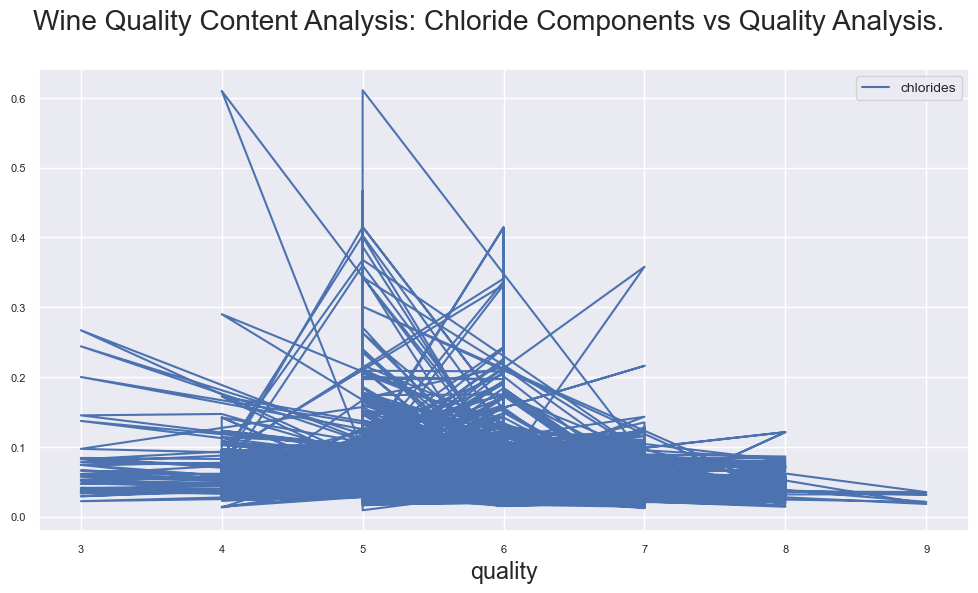

In [564]:
combined_wine_chloride_df.plot(title="Wine Quality Content Analysis: Chloride Components vs Quality Analysis.",#kind='bar', color='red',
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
#.plot(kind='bar', color='red')
plt.show()

In [255]:
combined_wine_qlt_df =pd.DataFrame(combined_wine_df, columns= ["quality"])
combined_wine_qlt_df.T

0     1     2     3     4     5     6     7     8     9     ...  \
quality     5     5     5     6     5     5     5     7     7     5  ...   

         6487  6488  6489  6490  6491  6492  6493  6494  6495  6496  
quality     5     6     6     6     5     6     5     6     7     6  

[1 rows x 6497 columns]

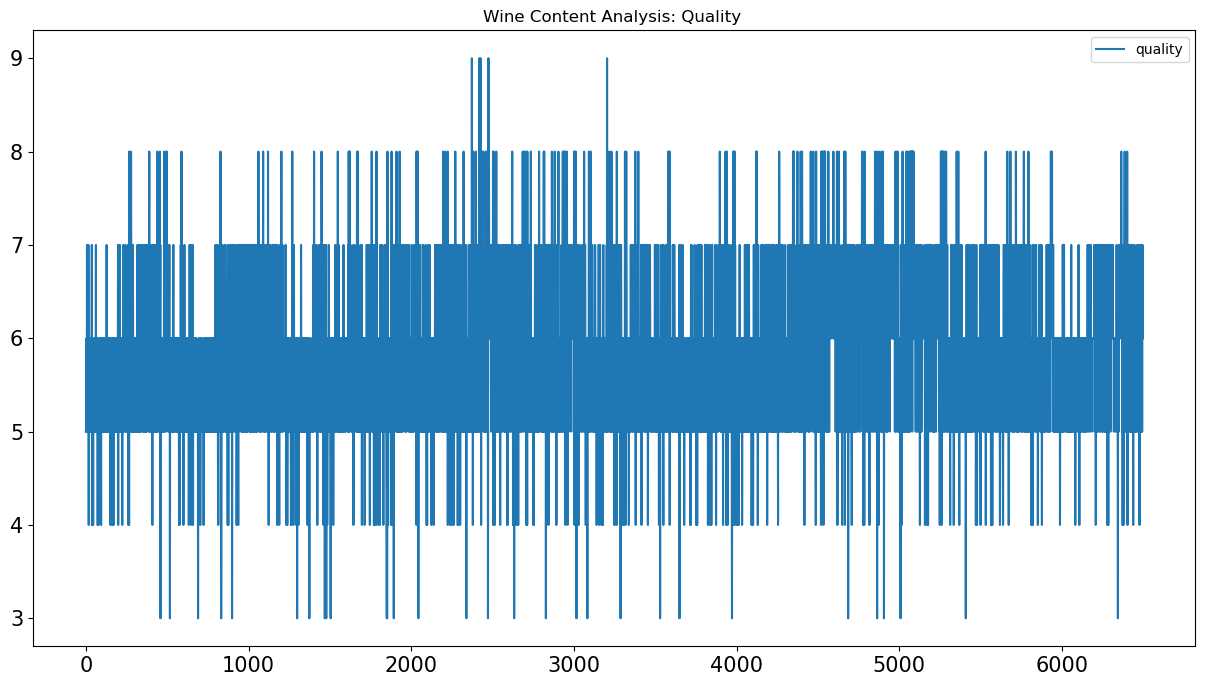

In [256]:
combined_wine_qlt_df.plot(title="Wine Content Analysis: Quality ", figsize = (15,8), fontsize = 15)
plt.legend(fontsize = 10 )
plt.show()

In [257]:
combined_wine_qlt_df.set_index("quality").sort_index().T

Empty DataFrame
Columns: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...]
Index: []

[0 rows x 6497 columns]

In [342]:
new_combined_wine_qlt_df = combined_wine_qlt_df.groupby(['quality']).sum() #.pct_change()
new_combined_wine_qlt_df.T

Empty DataFrame
Columns: [3, 4, 5, 6, 7, 8, 9]
Index: []

In [630]:
# combined_wine_qlt_df.plot(title="Wine Content Analysis: Quality ", figsize = (15,8), fontsize = 15)
# plt.legend(fontsize = 10 )
# plt.show()

#### Digging Deeper into the wine quality data with iloc

In [260]:
# combined_wine_df_i = combined_wine_df.iloc[0]
# combined_wine_df_i.head(15)
# combined_wine_df_i.tail(15)
combined_wine_df.iloc[0]  ### Row Index 0

fixed acidity              7.4
volatile acidity           0.7
citric acid                0.0
residual sugar             1.9
chlorides                0.076
free sulfur dioxide       11.0
total sulfur dioxide      34.0
density                 0.9978
pH                        3.51
sulphates                 0.56
alcohol                    9.4
quality                      5
color                      red
Name: 0, dtype: object

In [261]:
combined_wine_df.value_counts() 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  color
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6        red      4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6        red      4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7        red      4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5        red      4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5     

In [262]:
wine_index_df = combined_wine_df.set_index("quality").value_counts().sort_index()
wine_index_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  color
4.6            0.520             0.15         2.1             0.054      8.0                  65.0                  0.99340  3.90  0.56       13.1     red      1
4.7            0.600             0.17         2.3             0.058      17.0                 106.0                 0.99320  3.85  0.60       12.9     red      1
4.9            0.420             0.00         2.1             0.048      16.0                 42.0                  0.99154  3.71  0.74       14.0     red      1
5.0            0.380             0.01         1.6             0.048      26.0                 60.0                  0.99084  3.70  0.75       14.0     red      1
               0.400             0.50         4.3             0.046      29.0                 80.0                  0.99020  3.49  0.66       13.6     red      1
                                 

In [343]:
wine_index_df = combined_wine_df.set_index("quality")#.value_counts().sort_index()
wine_index_df

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
5                  7.4              0.70         0.00             1.9   
5                  7.8              0.88         0.00             2.6   
5                  7.8              0.76         0.04             2.3   
6                 11.2              0.28         0.56             1.9   
5                  7.4              0.70         0.00             1.9   
...                ...               ...          ...             ...   
6                  6.2              0.21         0.29             1.6   
5                  6.6              0.32         0.36             8.0   
6                  6.5              0.24         0.19             1.2   
7                  5.5              0.29         0.30             1.1   
6                  6.0              0.21         0.38             0.8   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
5            0.076                 11.0                  34.0  0.99780  3.51   
5            0.098                 25.0                  67.0  0.99680  3.20   
5            0.092                 15.0                  54.0  0.99700  3.26   
6            0.075                 17.0                  60.0  0.99800  3.16   
5            0.076                 11.0                  34.0  0.99780  3.51   
...            ...                  ...                   ...      ...   ...   
6            0.039                 24.0                  92.0  0.99114  3.27   
5            0.047                 57.0                 168.0  0.99490  3.15   
6            0.041                 30.0                 111.0  0.99254  2.99   
7            0.022                 20.0                 110.0  0.98869  3.34   
6            0.020                 22.0                  98.0  0.98941  3.26   

         sulphates  alcohol color  
quality                            
5             0.56      9.4   red  
5             0.68      9.8   red  
5             0.65      9.8   red  
6             0.58      9.8   red  
5             0.56      9.4   red  
...            ...      ...   ...  
6             0.50     11.2   NaN  
5             0.46      9.6   NaN  
6             0.46      9.4   NaN  
7             0.38     12.8   NaN  
6             0.32     11.8   NaN  

[6497 rows x 12 columns]

In [263]:
wine_index_df.nunique()

4

In [264]:
wine_index_df.describe().loc[["mean", "std"]] ## mean and std
combined_wine_df.describe().T.loc[: ,["mean", "std"]] ## mean and std

mean        std
fixed acidity           7.215307   1.296434
volatile acidity        0.339666   0.164636
citric acid             0.318633   0.145318
residual sugar          5.443235   4.757804
chlorides               0.056034   0.035034
free sulfur dioxide    30.525319  17.749400
total sulfur dioxide  115.744574  56.521855
density                 0.994697   0.002999
pH                      3.218501   0.160787
sulphates               0.531268   0.148806
alcohol                10.491801   1.192712
quality                 5.818378   0.873255

In [265]:
# wine_index_df = combined_wine_df.set_index("quality").value_counts().sort_index()
# wine_index_df

In [266]:

#plot(title="Wine Quality Analysis Preview ", figsize = (15,8), fontsize = 15)
#plt.legend(fontsize = 10 )
#plt.show()

In [267]:
wine_index_df.iloc[0] ### Row Index 0, column 11 (quality) based 

1

In [268]:
combined_wine_df.iloc[0,11]

5

In [269]:
combined_wine_df_i = combined_wine_df.iloc[0,11]

In [270]:
combined_wine_df.quality.div(combined_wine_df_i) 


0       1.0
1       1.0
2       1.0
3       1.2
4       1.0
       ... 
6492    1.2
6493    1.0
6494    1.2
6495    1.4
6496    1.2
Name: quality, Length: 6497, dtype: float64

In [271]:
combd_wine_quality_df = combined_wine_df.quality.div(combined_wine_df_i)#.mul(100)
round(combd_wine_quality_df,2)

0       1.0
1       1.0
2       1.0
3       1.2
4       1.0
       ... 
6492    1.2
6493    1.0
6494    1.2
6495    1.4
6496    1.2
Name: quality, Length: 6497, dtype: float64

In [272]:
round(combd_wine_quality_df,2).sort_values()

5409    0.6
2339    0.6
3016    0.6
1478    0.6
459     0.6
       ... 
2475    1.8
2426    1.8
2373    1.8
2419    1.8
3204    1.8
Name: quality, Length: 6497, dtype: float64

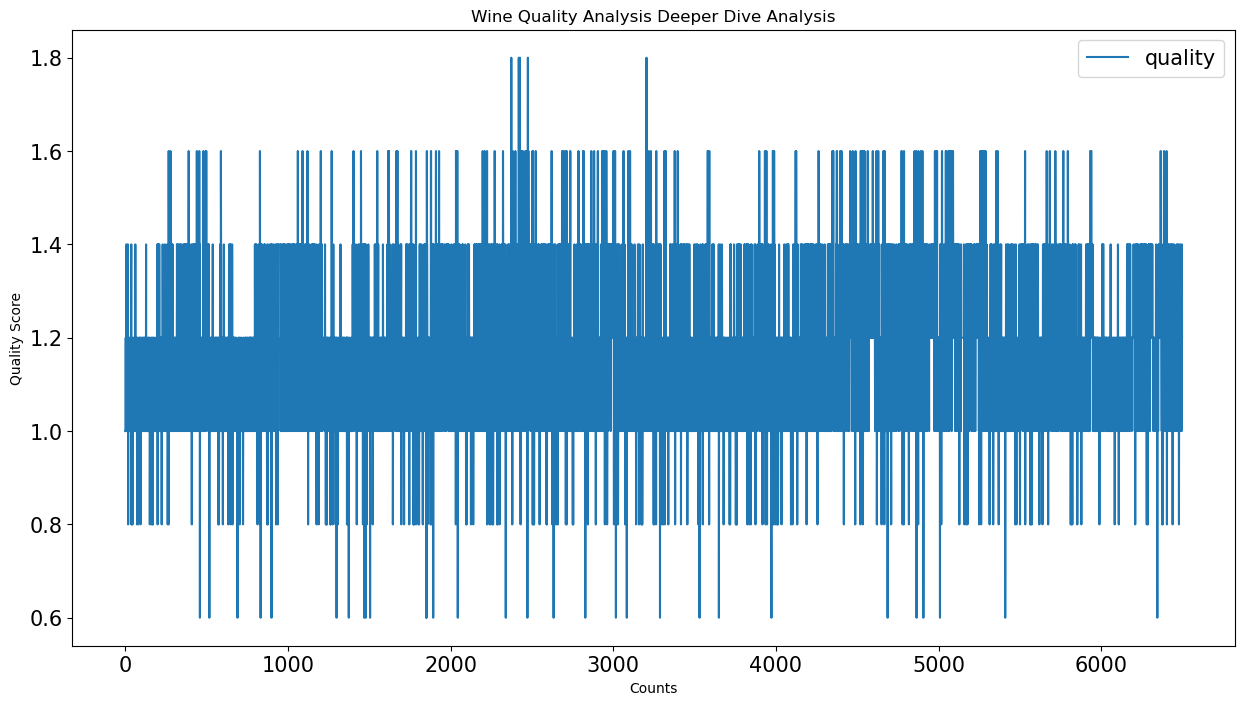

In [273]:
###... normalized percentage view of the chart of Wine Quality vs Count
combd_wine_quality_df.plot(title="Wine Quality Analysis Deeper Dive Analysis", figsize=(15,8), fontsize=15)
plt.legend(fontsize = 15 )
plt.ylabel('Quality Score')
plt.xlabel('Counts')
plt.show()

In [274]:
display(combd_wine_quality_df.nunique())
display(combd_wine_quality_df.unique())

7

array([1. , 1.2, 1.4, 0.8, 1.6, 0.6, 1.8])

In [275]:
# combd_wine_quality_df.unique.plot(title="Wine Quality Analysis Deeper Dive  Analysis", figsize=(15,8), fontsize=15)
# plt.legend(fontsize = 15 )
# plt.ylabel('Quality Score')
# plt.xlabel('Counts')
# plt.show()

In [276]:
# plt.figure(figsize=(10, 8))
# combd_wine_quality_df['quality'].value_counts().sort_index().plot(kind='bar', color='red')
# plt.title('Total Count of Each Wine vs Quality')
# plt.xlabel('Quality Score')
# plt.ylabel('Count')
# plt.grid(axis='y')
# plt.show()

In [277]:
round((combd_wine_quality_df).median(),2)
round((combd_wine_quality_df).mean(),2)
combd_wine_quality_df.describe()


count    6497.000000
mean        1.163676
std         0.174651
min         0.600000
25%         1.000000
50%         1.200000
75%         1.200000
max         1.800000
Name: quality, dtype: float64

In [278]:
combined_wine_df.chlorides.div(combined_wine_df_i) 

0       0.0152
1       0.0196
2       0.0184
3       0.0150
4       0.0152
         ...  
6492    0.0078
6493    0.0094
6494    0.0082
6495    0.0044
6496    0.0040
Name: chlorides, Length: 6497, dtype: float64

In [279]:
wine_q= combined_wine_df.groupby("quality").sum
wine_q

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001FF145EC9A0>>

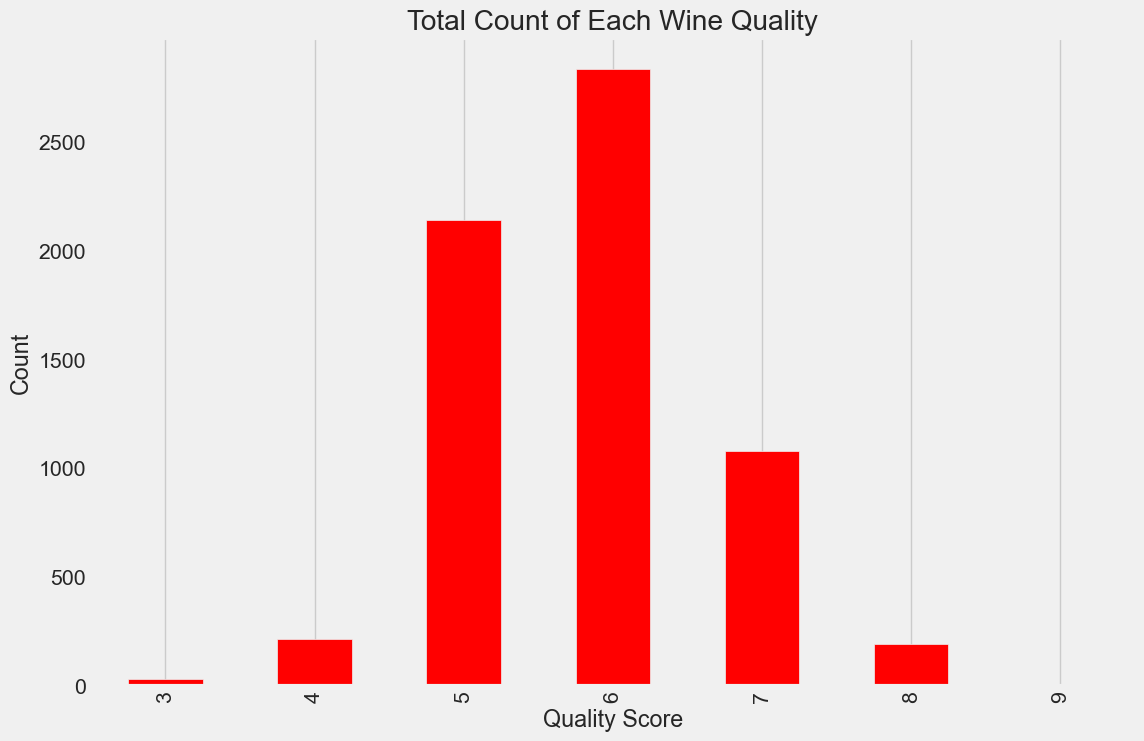

In [704]:
plt.figure(figsize=(12, 8))
combined_wine_df['quality'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Total Count of Each Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

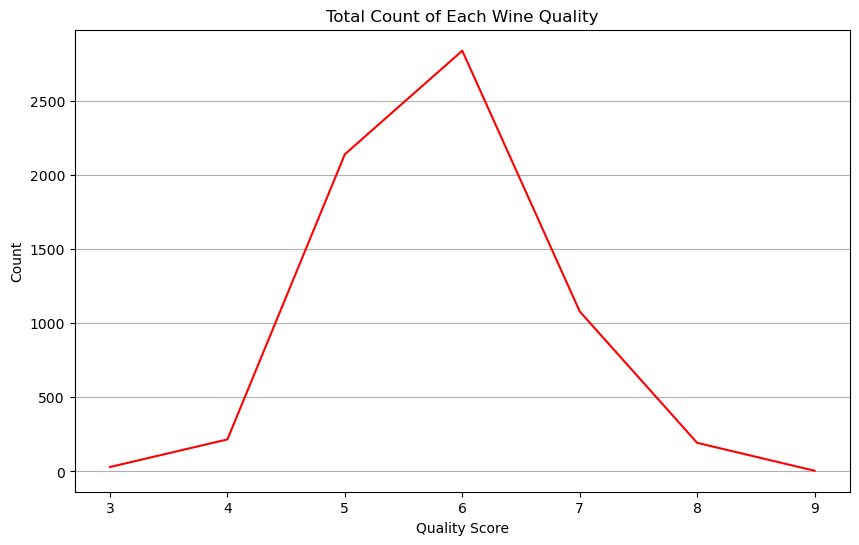

In [281]:
plt.figure(figsize=(10, 6))
combined_wine_df['quality'].value_counts().sort_index().plot(kind='line', color='red')
plt.title('Total Count of Each Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

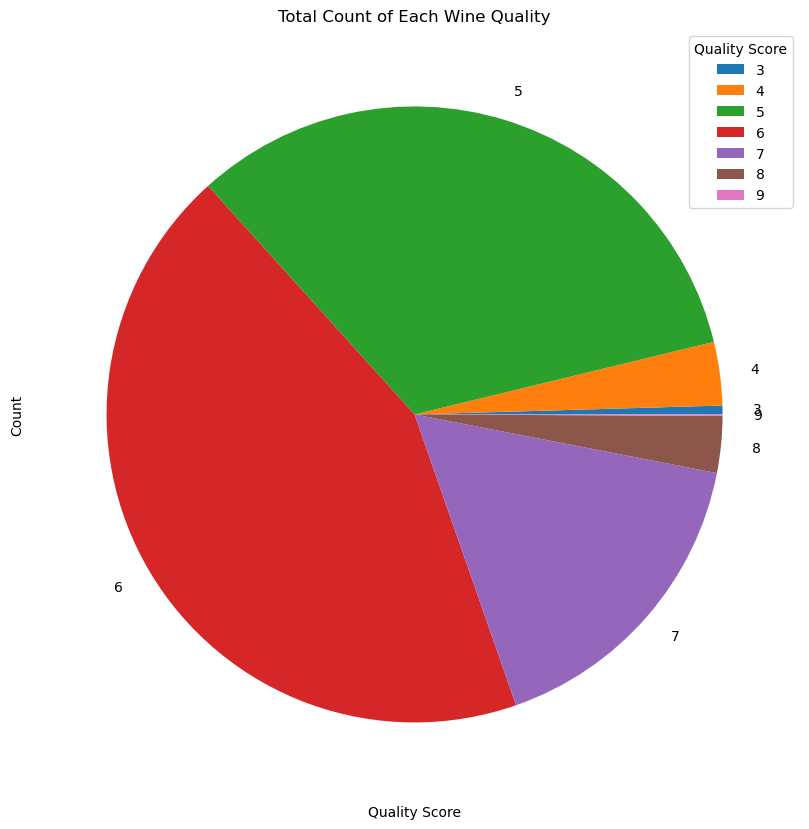

In [282]:
plt.figure(figsize=(10, 10))
combined_wine_df['quality'].value_counts().sort_index().plot(kind='pie', color='red')
plt.title('Total Count of Each Wine Quality')
plt.legend(title='Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()
#autopct=(%1.1f%%),

In [283]:
# plt.figure(figsize=(10, 10))
# combined_wine_df['quality'].value_counts().sort_index().plot(kind='pie', autopct=(%1.1f%%), color='red')
# plt.title('Total Count of Each Wine Quality')
# plt.legend(title='Quality Score')
# #autopct=(%1.1f%%),
# plt.xlabel('Quality Score')
# plt.ylabel('Count')
# plt.grid(axis='y')
# plt.show()

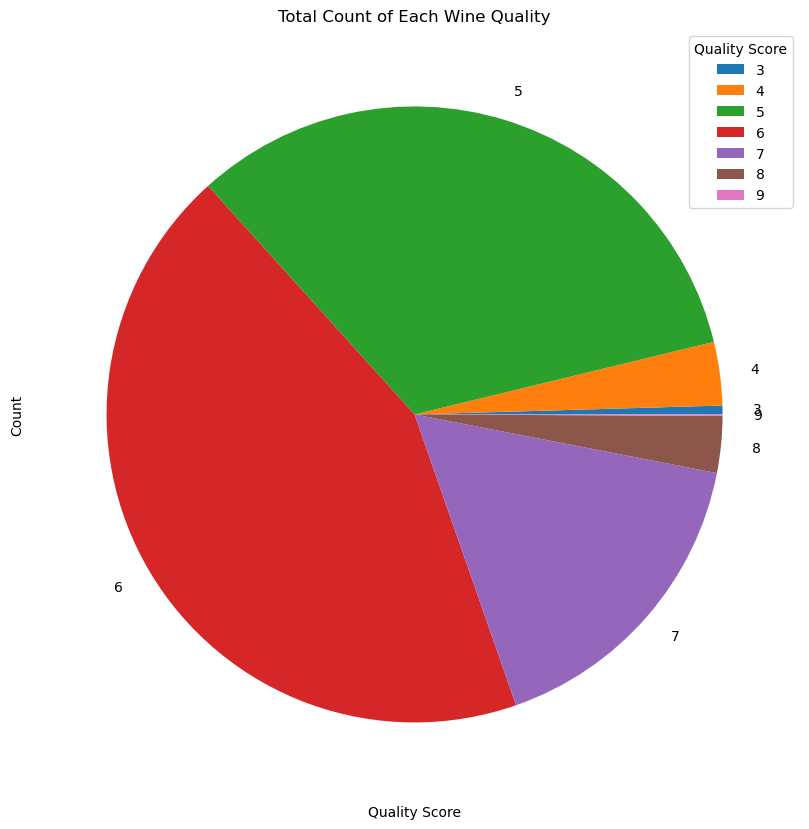

In [284]:
plt.figure(figsize=(10, 10))
combined_wine_df['quality'].value_counts().sort_index().plot(kind='pie', color='red')
plt.title('Total Count of Each Wine Quality')
plt.legend(title='Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [285]:
# combined_wine_df_gp = combined_wine_df.groupby(by = [alcohol, total sulfur dioxide]).sum()
# combined_wine_df_gp

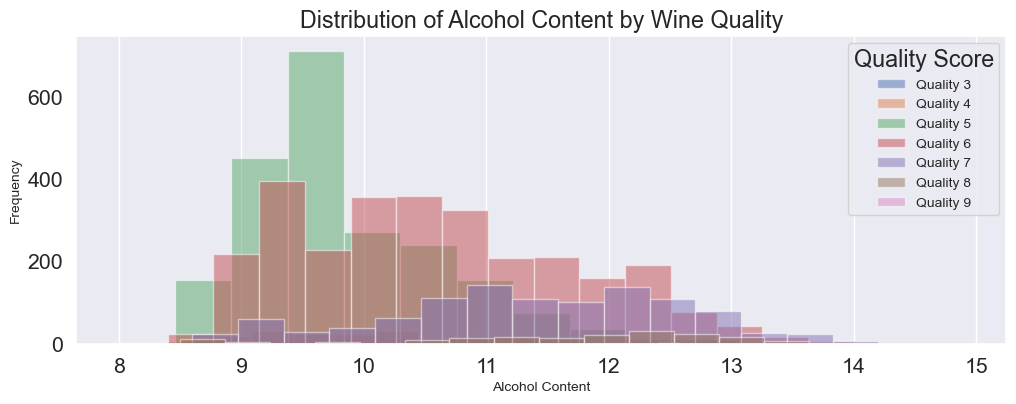

In [593]:
plt.figure(figsize=(12, 4))
#plt.(fontsize = 10 )
for quality in sorted(combined_wine_df['quality'].unique()):
    subset = combined_wine_df[combined_wine_df['quality'] == quality]
    plt.hist(subset['alcohol'], bins=15, alpha=0.5, label=f'Quality {quality}')
plt.title('Distribution of Alcohol Content by Wine Quality')
plt.xlabel('Alcohol Content', fontsize = 10 )
plt.ylabel('Frequency' , fontsize = 10 )
plt.legend(title='Quality Score', fontsize = 10 ) 
#plt.legend(fontsize = 10 )
plt.grid(axis='y')
plt.show()

In [287]:
combined_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

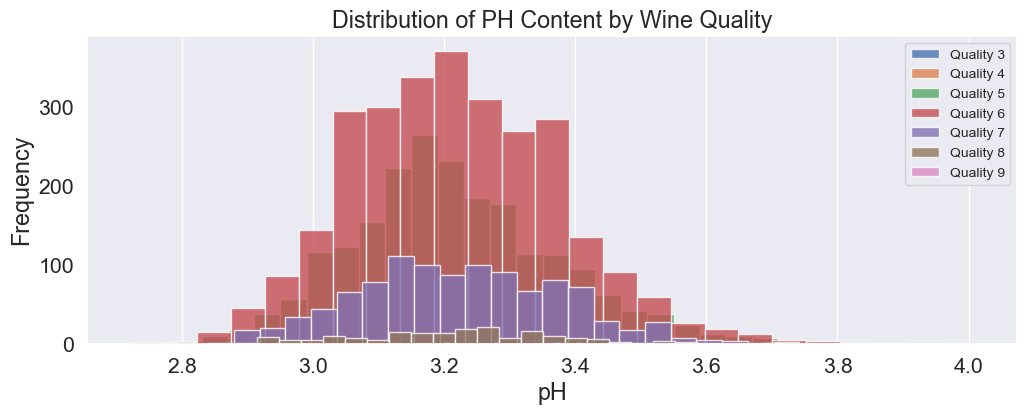

In [589]:
plt.figure(figsize=(12, 4))
for quality in sorted(combined_wine_df['quality'].unique()):
    subset = combined_wine_df[combined_wine_df['quality'] == quality]
    plt.hist(subset['pH'], bins=25, alpha=0.8, label=f'Quality {quality}') #, cmap="RdYlGn")
#plt.title('Average Chlorides by Wine Quality')
plt.title('Distribution of PH Content by Wine Quality')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend(title='Quality Score')
plt.legend(fontsize = 10 )
plt.grid(axis='y')
plt.show()

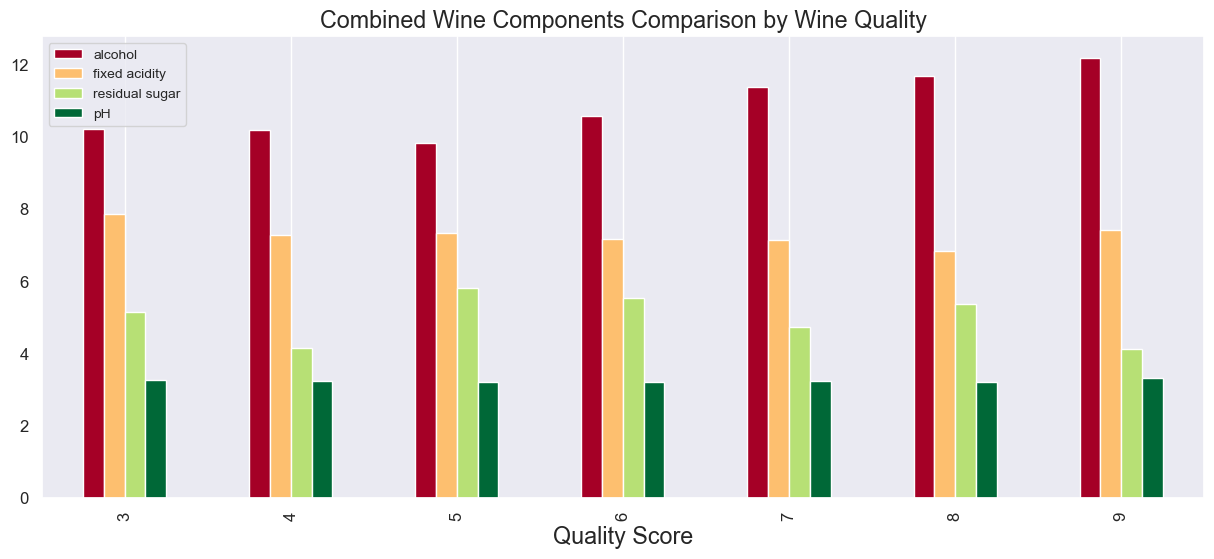

In [629]:
combined_wine_df.groupby('quality')[[
    #"sulphates","citric acid","volatile acidity","chlorides","total sulfur dioxide","free sulfur dioxide",
    "alcohol","fixed acidity","residual sugar","pH",
    ]].mean().plot(kind='bar',cmap="RdYlGn",figsize=(15,6), fontsize=12)
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 10 )
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()
#cmap="RdYlGn"
#"total sulfur dioxide","free sulfur dioxide","alcohol","fixed acidity","residual sugar","pH",

In [292]:
# combined_wine_df.value_counts()

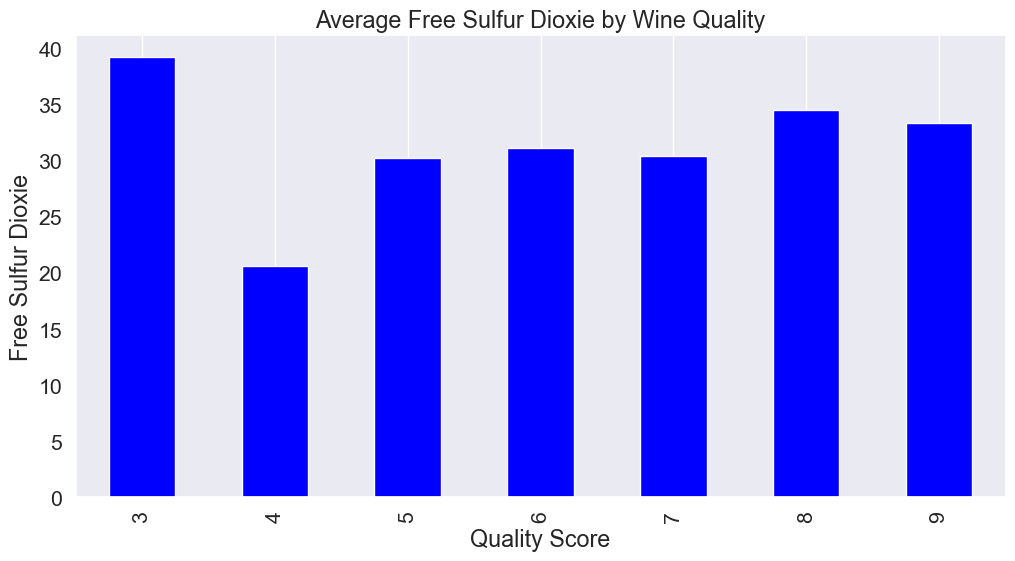

In [594]:
plt.figure(figsize=(12, 6))
combined_wine_df.groupby('quality')['free sulfur dioxide'].mean().plot(kind='bar', color='blue')
plt.title('Average Free Sulfur Dioxie by Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Free Sulfur Dioxie')
plt.grid(axis='y')
plt.show()

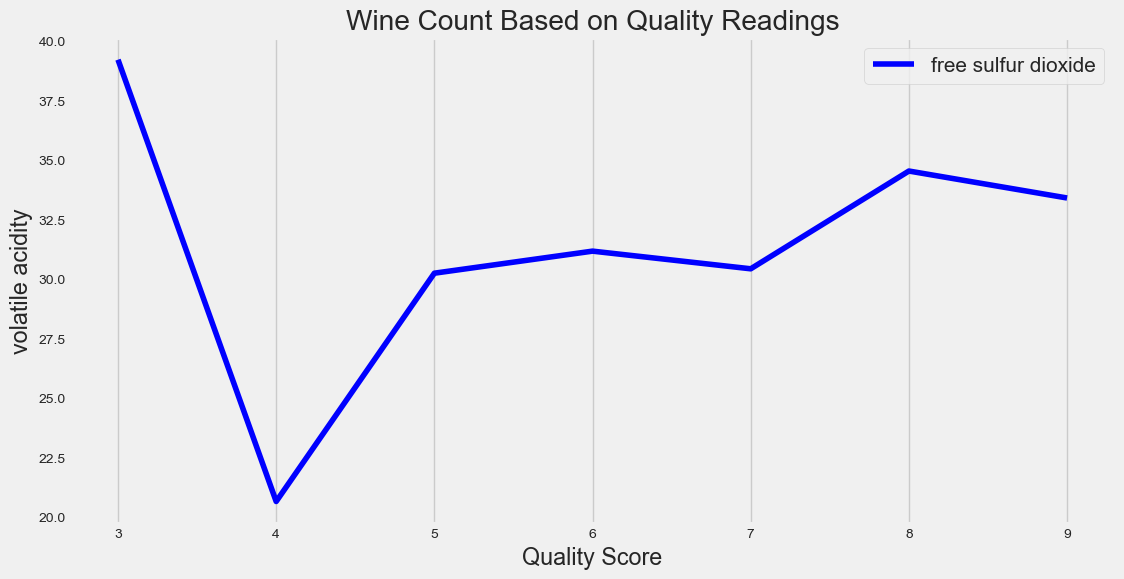

In [673]:
# plt.figure(figsize=(10, 6))
combined_wine_df.groupby('quality')['free sulfur dioxide'].mean().plot(kind='line', color='blue',figsize=(12,6), fontsize=10)
plt.title('Wine Count Based on Quality Readings')
plt.ylabel('Free Sulfur Dioxide Levels')
plt.style.use("fivethirtyeight")
plt.ylabel('volatile acidity' )
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

In [294]:
combined_wine_df.loc[[quality]]  

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9            7.5               0.5         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                 17.0                 102.0   0.9978  3.35        0.8   

   alcohol  quality color  
9     10.5        5   red

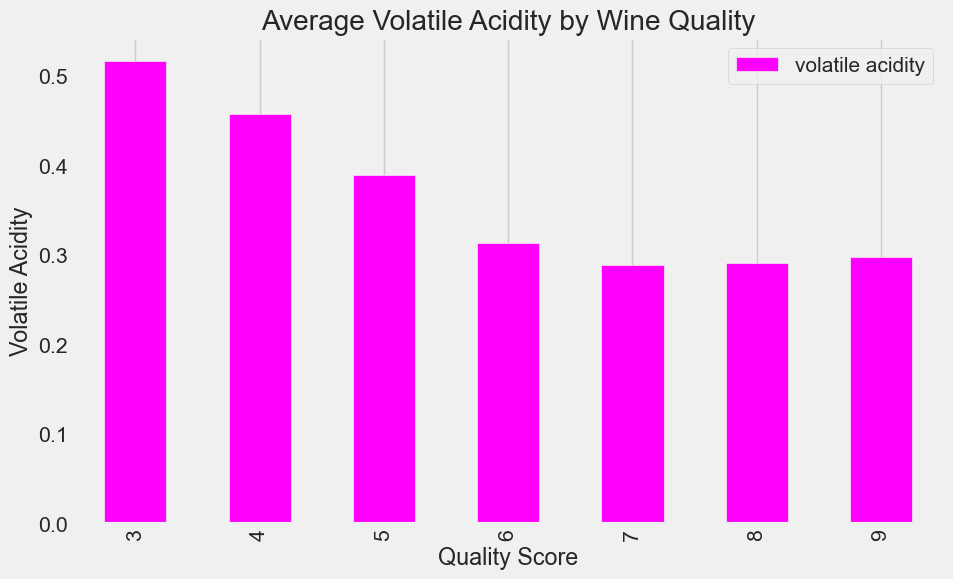

In [672]:
plt.figure(figsize=(10, 6))
combined_wine_df.groupby('quality')['volatile acidity'].mean().plot(kind='bar', color='magenta')
plt.title('Average Volatile Acidity by Wine Quality')
plt.ylabel('Volatile Acidity')
plt.xlabel('Quality Score' )
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

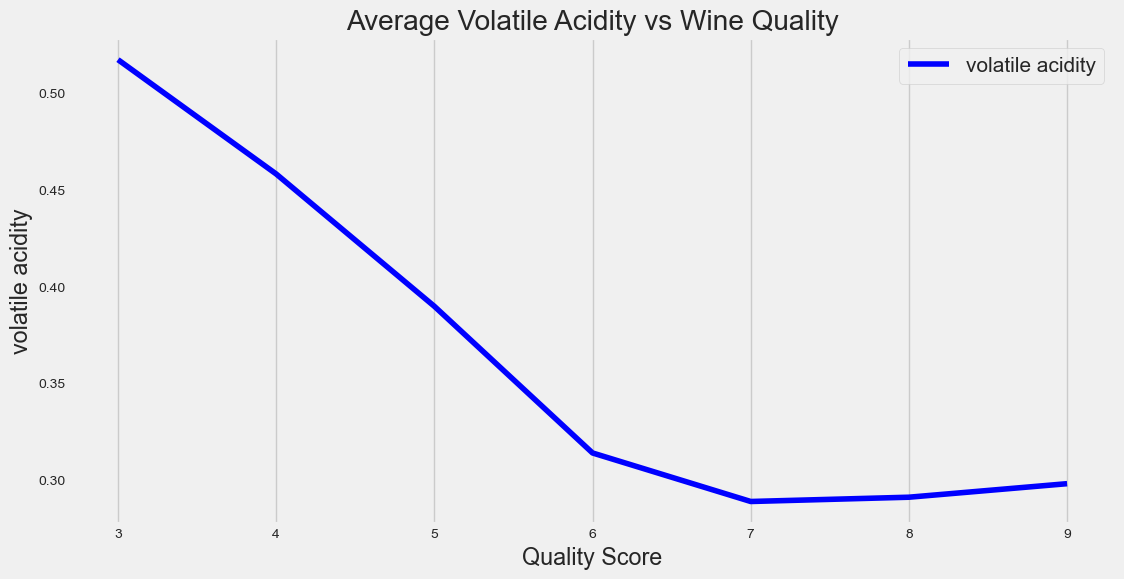

In [671]:
combined_wine_df.groupby('quality')['volatile acidity'].mean().plot(kind='line', color='blue',figsize=(12,6), fontsize=10)
#combined_wine_df.groupby('quality')['volatile acidity'].mean().plot(kind='bar', color='magenta',figsize=(12,6), fontsize=10)
plt.title('Average Volatile Acidity vs Wine Quality')
plt.style.use("fivethirtyeight")
plt.ylabel('volatile acidity')
plt.legend(fontsize = 15 )
plt.xlabel('Quality Score')
plt.grid(axis='y')
plt.show()

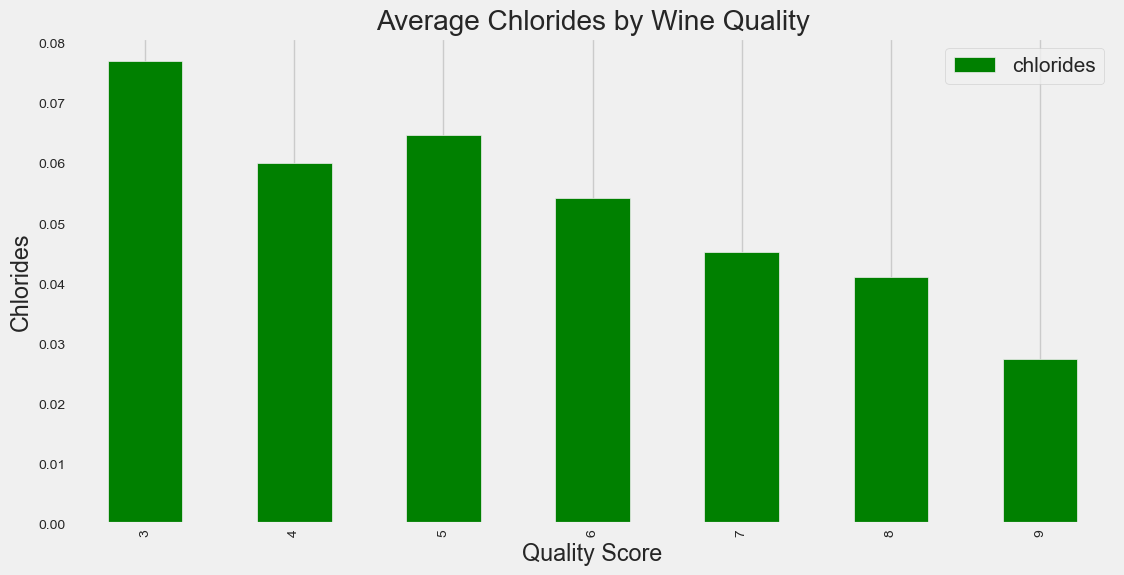

In [669]:
#plt.figure(figsize=(10, 6))
combined_wine_df.groupby('quality')['chlorides'].mean().plot(kind='bar', color="green",figsize=(12,6), fontsize=10) #cmap="RdYlGn")
plt.title('Average Chlorides by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()

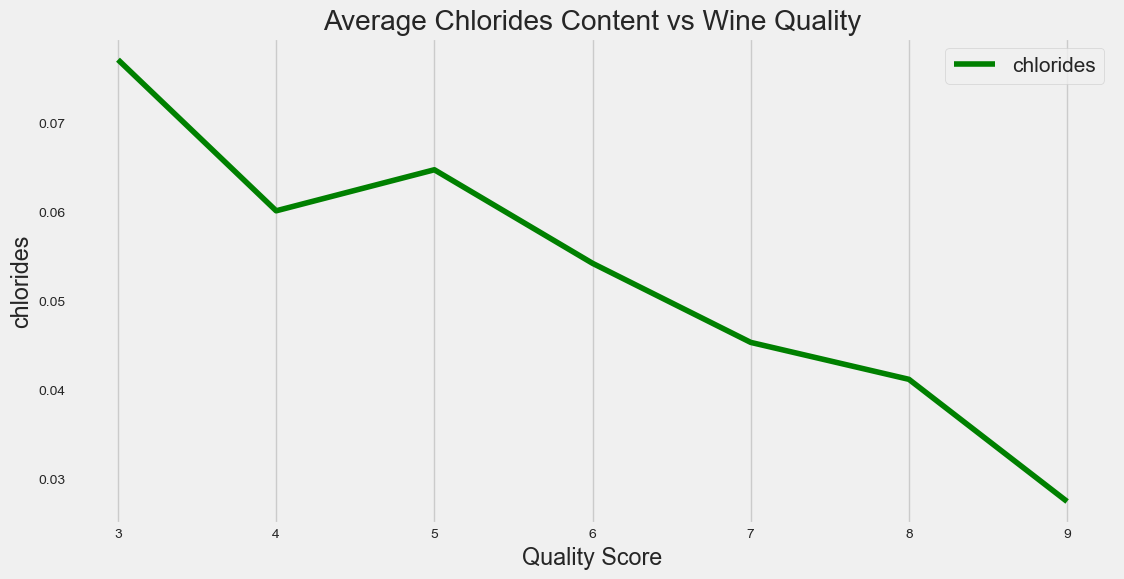

In [668]:
combined_wine_df.groupby('quality')['chlorides'].mean().plot(kind='line', color='green',figsize=(12,6), fontsize=10)
plt.title('Average Chlorides Content vs Wine Quality')
plt.style.use("fivethirtyeight")
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.ylabel('chlorides')
plt.grid(axis='y')
plt.show()

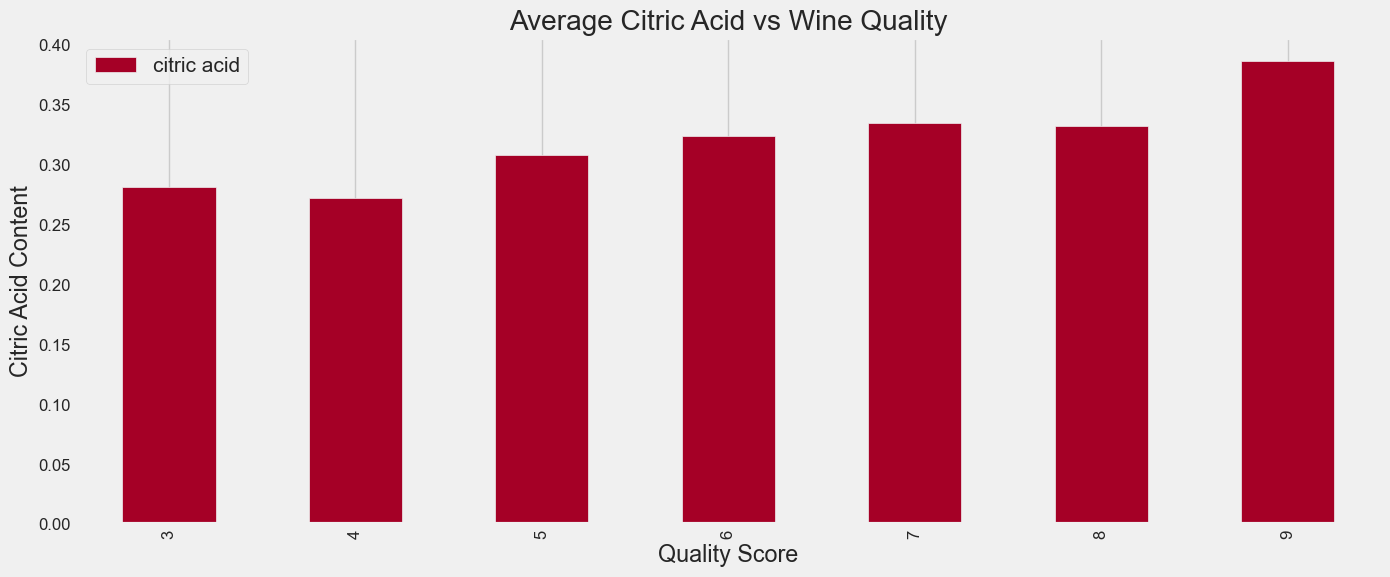

In [666]:
#plt.figure(figsize=(15, 10))
combined_wine_df.groupby('quality')[['citric acid',]].mean().plot(kind='bar', cmap="RdYlGn",figsize=(15,6), fontsize=12)
plt.title('Average Citric Acid vs Wine Quality')
plt.ylabel('Citric Acid Content')
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

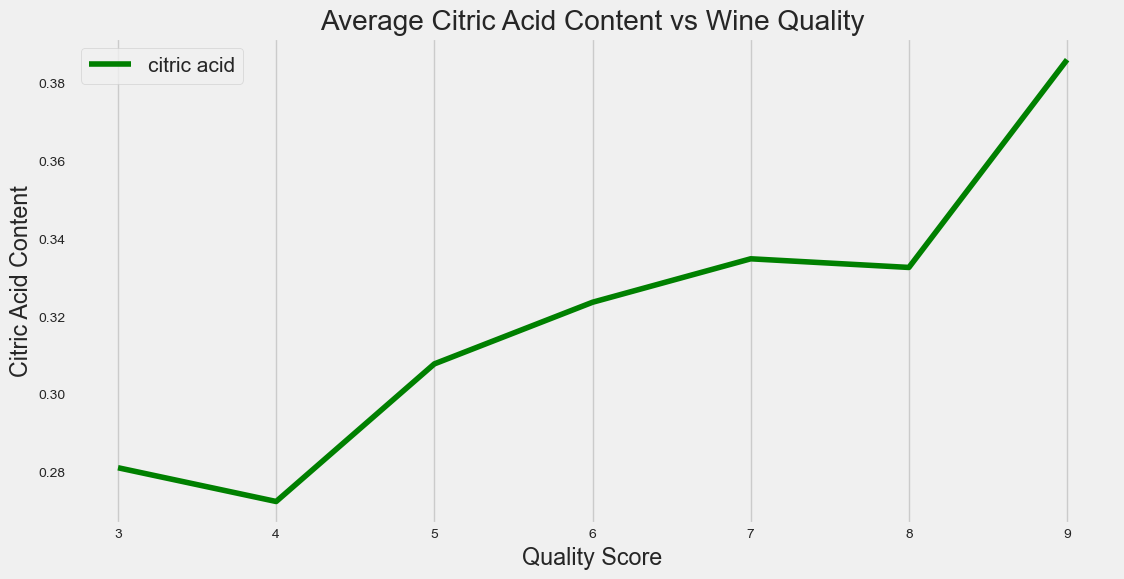

In [684]:
combined_wine_df.groupby('quality')['citric acid'].mean().plot(kind='line', color='green',figsize=(12,6), fontsize=10)
plt.title('Average Citric Acid Content vs Wine Quality')
plt.ylabel('Citric Acid Content')
plt.style.use("fivethirtyeight")
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

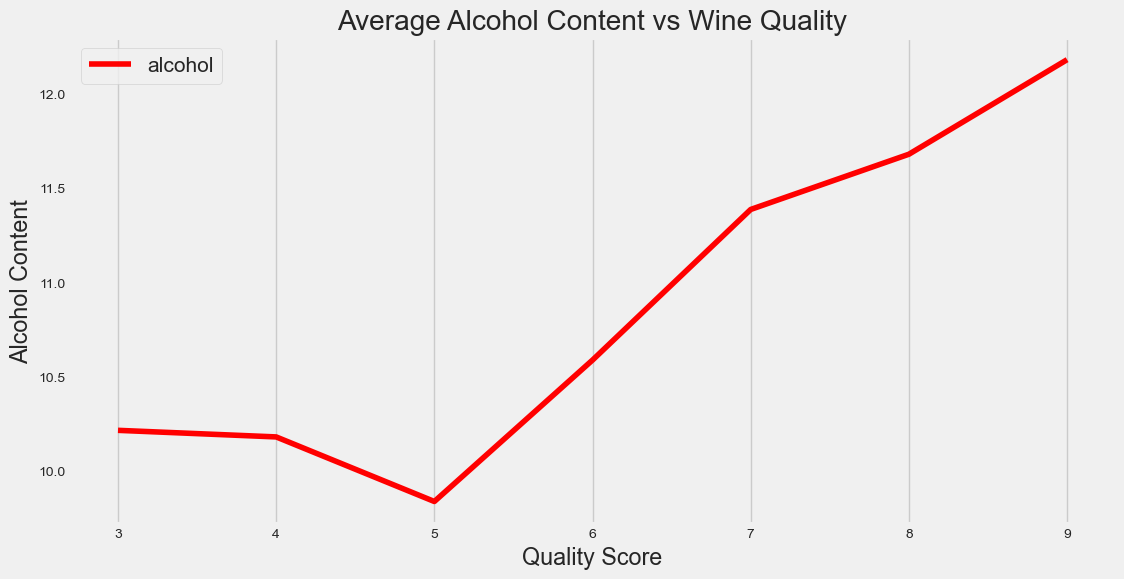

In [686]:
combined_wine_df.groupby('quality')['alcohol'].mean().plot(kind='line', color='red',figsize=(12,6), fontsize=10)
plt.title('Average Alcohol Content vs Wine Quality')
plt.ylabel('Alcohol Content')
plt.style.use("fivethirtyeight")
plt.xlabel('Quality Score')
plt.legend(fontsize = 15 )
plt.grid(axis='y')
plt.show()

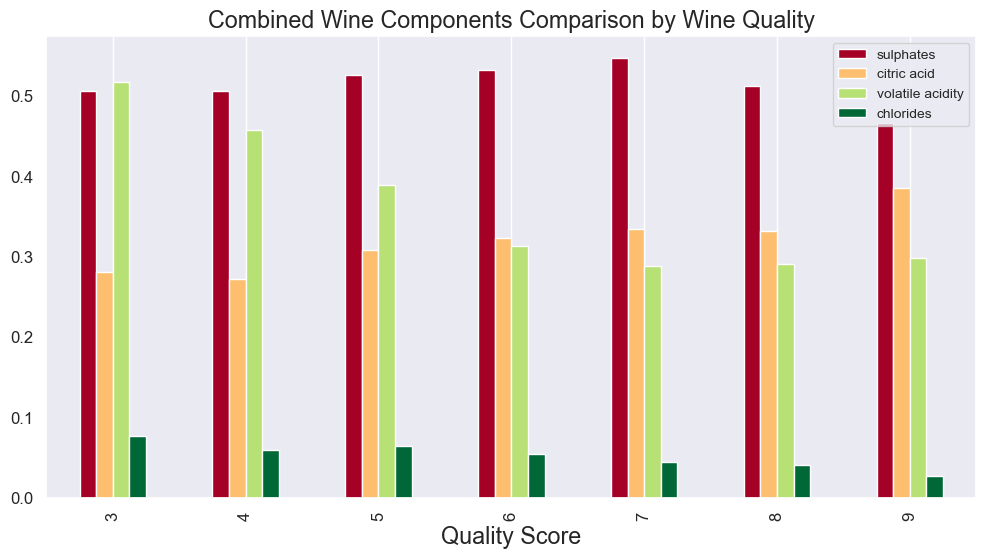

In [650]:
#plt.figure(figsize=(15, 12))
combined_wine_df.groupby('quality')[["sulphates","citric acid","volatile acidity","chlorides"]].mean().plot(kind='bar',cmap="RdYlGn",figsize=(12,6), fontsize=12)
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 10 )
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()
#cmap="RdYlGn"
#"total sulfur dioxide","free sulfur dioxide","alcohol","fixed acidity","residual sugar","pH",

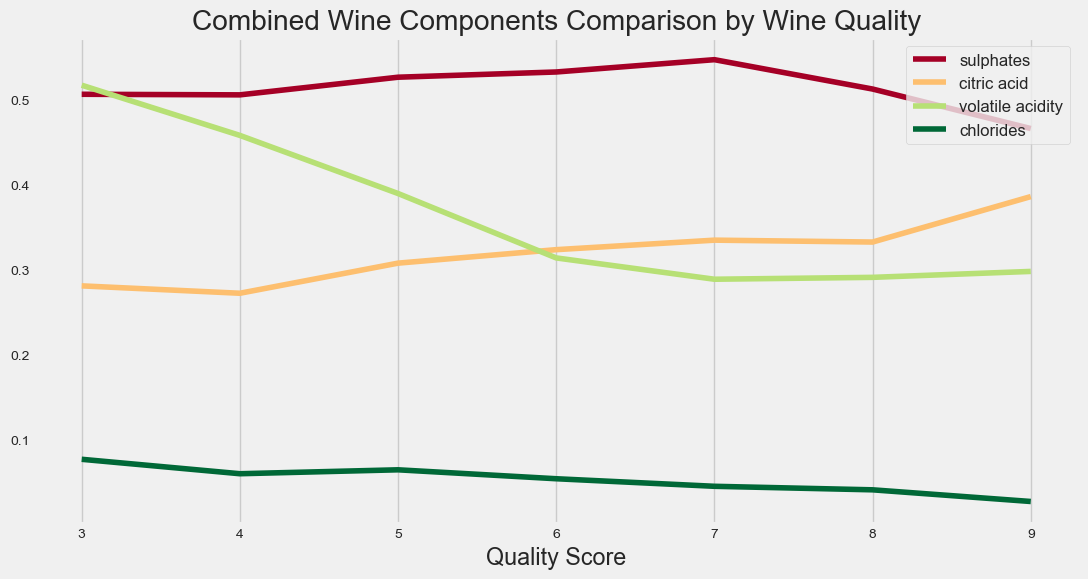

In [677]:
combined_wine_df.groupby('quality')[["sulphates","citric acid","volatile acidity","chlorides"]].mean().plot(kind='line',cmap="RdYlGn",figsize=(12, 6),fontsize=10)
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 12)
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()

In [680]:
# #plt.figure(figsize=(15, 12))
# combined_wine_df.groupby('quality')[["sulphates","citric acid","volatile acidity","chlorides"]].mean().plot(kind='line',cmap="RdYlGn",
#                                                                                               figsize=(15,6), fontsize=12)
# plt.title('Combined Wine Components Comparison by Wine Quality')
# plt.xlabel('Quality Score')
# plt.legend(fontsize = 10 )
# #plt.ylabel('Chlorides')
# plt.grid(axis='y')
# plt.show()

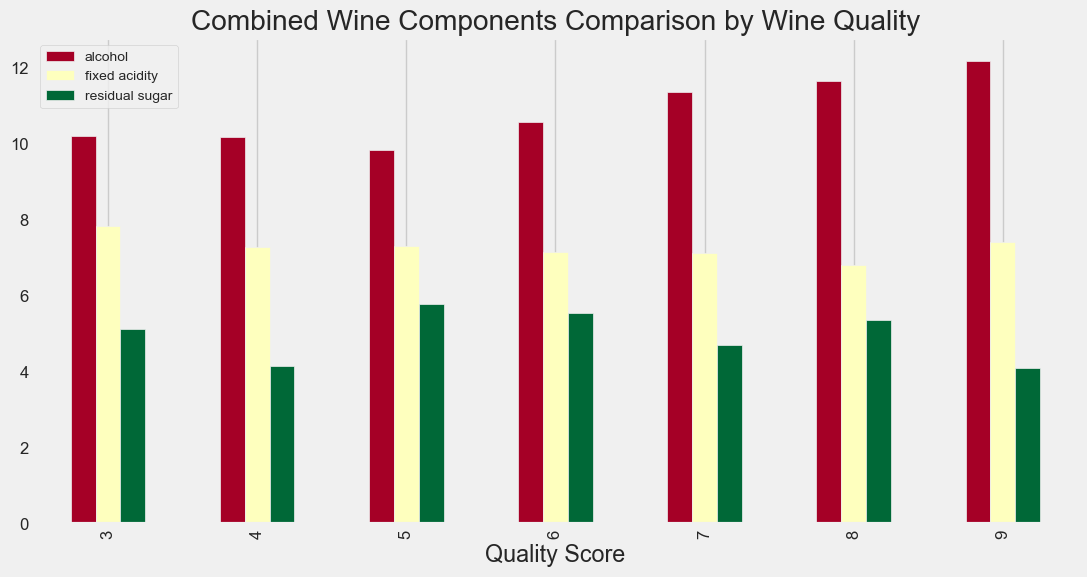

In [682]:
#plt.figure(figsize=(15, 10))
combined_wine_df.groupby('quality')[["alcohol","fixed acidity","residual sugar"]].mean().plot(kind='bar',cmap="RdYlGn",figsize=(12, 6),fontsize=12 )
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 10 )
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()

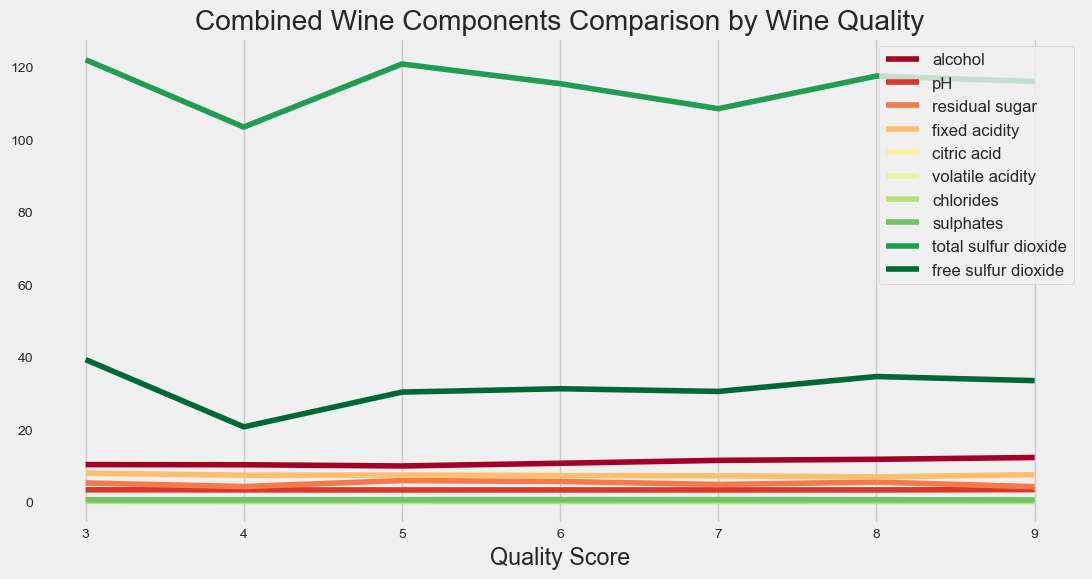

In [687]:
combined_wine_df.groupby('quality')[[
    "alcohol","pH","residual sugar","fixed acidity","citric acid","volatile acidity","chlorides","sulphates","total sulfur dioxide","free sulfur dioxide"
    #"sulphates","citric acid","volatile acidity","chlorides"
  ]].mean().plot(kind='line',cmap="RdYlGn",figsize=(12, 6),fontsize=10)
plt.title('Combined Wine Components Comparison by Wine Quality')
plt.xlabel('Quality Score')
plt.legend(fontsize = 12)
#plt.ylabel('Chlorides')
plt.grid(axis='y')
plt.show()